In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv("Customer_churn.csv")

In [3]:
df=pd.DataFrame(data=df1)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
df.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape

(7043, 21)

In [8]:
df.ndim

2

In [9]:
df.size

147903

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Observation Shows:

1. O1 float Column 
2. 02 Interger Column
3. 18 object Columns

- Space usage: 1.1+ MB

# About Columns.

 0.   customerID       Customer Indentification Number. 
 1.   gender           Male/Female
 2.   SeniorCitizen    If Person is Senior Citizen.
 3.   Partner          If Person Having Parter.
 4.   Dependents       If They Have dependents. 
 5.   Tenure           Term of Years.
 6.   PhoneService     Customer Having Phone Service. 
 7.   MultipleLines    Customer Using Multiple Lines
 8.   InternetService  Customer Using Internet Service. 
 9.   OnlineSecurity   Customer Using Online Security.
 10.  OnlineBackup     Customer Having Online Backup.
 11.  DeviceProtection Customer Having Device protection.
 12.  TechSupport      Customer Using TechSupport.
 13.  StreamingTV      Customer Using Streaming Tv. 
 14.  StreamingMovies  Customer Using Streaming Movies. 
 15.  Contract         Contact Terms Month or Year
 16.  PaperlessBilling Custommer Opted For Paperless Billing. 
 17.  PaymentMethod    Methord Used for Payment.
 18.  MonthlyCharges   Monthly Charges For Payment.
 19.  TotalCharges     Total Charges For Payment.
 20.  Churn            Churn is a quantifiable rate of change that occurs over a specified amount of time.

# Checking Null Values

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Checking Null Values in Visualization:

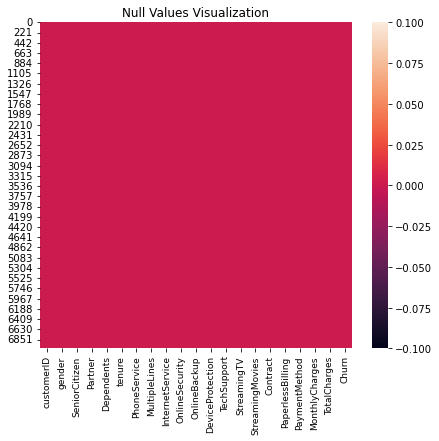

In [12]:
plt.figure(figsize=(7,6))
sns.heatmap(df.isnull())
plt.xticks(rotation=90,fontsize=9)
plt.title("Null Values Visualization",fontsize=12)
plt.show()

# Unique Values

In [13]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Checking Unique Values in Categorical Columns

In [14]:
for i in df.columns:
    if df[i].dtype=='object':
        print(i,'\n')
        print(df[i].unique())
        print("**"*20)

customerID 

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
****************************************
gender 

['Female' 'Male']
****************************************
Partner 

['Yes' 'No']
****************************************
Dependents 

['No' 'Yes']
****************************************
PhoneService 

['No' 'Yes']
****************************************
MultipleLines 

['No phone service' 'No' 'Yes']
****************************************
InternetService 

['DSL' 'Fiber optic' 'No']
****************************************
OnlineSecurity 

['No' 'Yes' 'No internet service']
****************************************
OnlineBackup 

['Yes' 'No' 'No internet service']
****************************************
DeviceProtection 

['No' 'Yes' 'No internet service']
****************************************
TechSupport 

['No' 'Yes' 'No internet service']
****************************************
StreamingTV 

['No' 'Yes' 'No internet service']


In [15]:
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

## Checking If any Unique Values in Numerical or Float Column

In [16]:
for i in df.columns:
    if df[i].dtypes=='int64':
        print("Numerical Column Shows","\n")
        print(i,"\n",df[i].unique())
        print("**"*20,"\n")

Numerical Column Shows 

SeniorCitizen 
 [0 1]
**************************************** 

Numerical Column Shows 

tenure 
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
**************************************** 



### Float Values

In [17]:
for i in df.columns:
    if df[i].dtypes=='float64':
        print(i,'\n')
        print(df[i].unique())
        print("**"*20)

MonthlyCharges 

[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
****************************************


In [18]:
df['MonthlyCharges'].is_unique

False

#### Here Total Charges Column Shows Being Numerical Values shows Category Values.

In [19]:
df[df['TotalCharges']==' '] # Empty rows in Total Charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [20]:
# replacing those with np.nan
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [21]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
#convert the data from column TotalCharges to float type
df['TotalCharges']=df['TotalCharges'].astype(float)

In [23]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

## Checking Duplicated Column

In [24]:
df[df.duplicated()].sum()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [25]:
# Deleting customerID columns, as that doesn't add any values to target variable for prediction.
df.drop(['customerID'],axis=1,inplace=True)

In [26]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Checking Values after Normal Imputation:

In [27]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

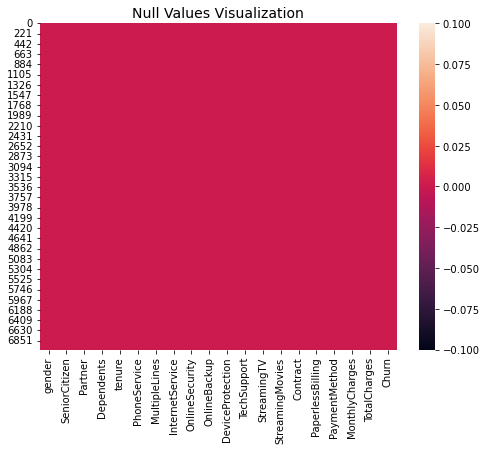

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())
plt.xticks(rotation=90,fontsize=10)
plt.title("Null Values Visualization",fontsize=14)
plt.show()

# EDA (Exploratory Data Analysis)

# Uni-variate Analysis

Gender Counts 
 Male      3555
Female    3488
Name: gender, dtype: int64


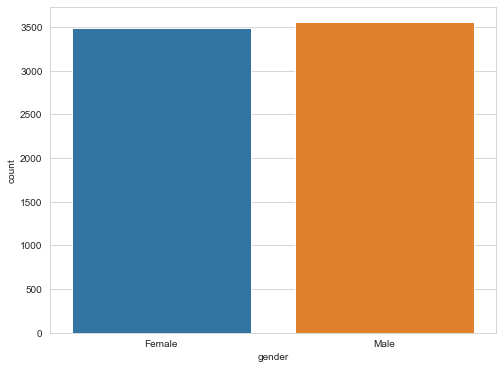

In [29]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='gender')
print("Gender Counts \n",df['gender'].value_counts())

Total Gender Counts 
- Male    = 3555
- Female  = 3488

### Maximum are Male User followed by Female User

Senior Citizen Counts 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64


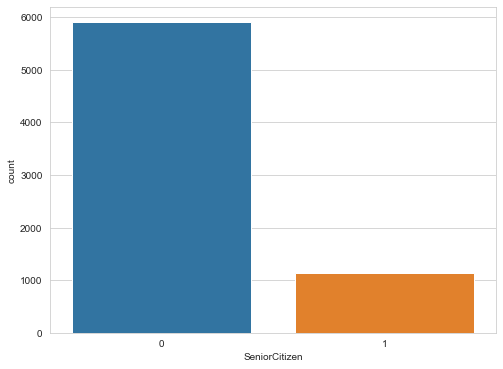

In [30]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='SeniorCitizen')
print("Senior Citizen Counts \n",df['SeniorCitizen'].value_counts())

Senior Citizen Counts 
- 0 Shows   5901
- 1 Shows   1142

Partner Counts 
 No     3641
Yes    3402
Name: Partner, dtype: int64


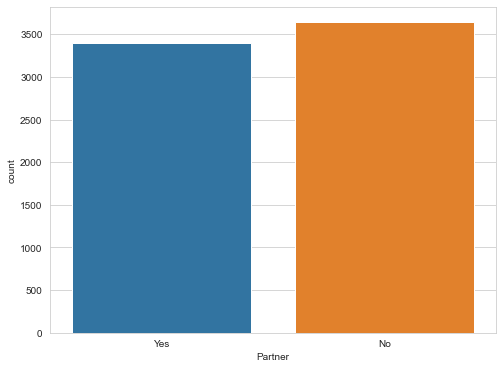

In [31]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='Partner')
print("Partner Counts \n",df['Partner'].value_counts())

Partner Counts 
- Without Partner Counts are 3641, With Partner counts are 3402

### Maximum Visiters are Without Partners

Dependents Counts 
 No     4933
Yes    2110
Name: Dependents, dtype: int64


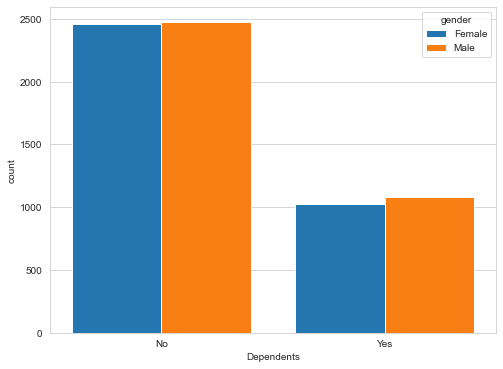

In [32]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='Dependents',hue='gender',palette=None,saturation=0.95,dodge=True)
print("Dependents Counts \n",df['Dependents'].value_counts())

Dependents Counts Shows that:
    
- Non-Dependents are 4933, Dependents Visiting are 2110

#### Dependents are Maximum Male User

Top 5 Tenure Counts 
 1     613
72    362
2     238
3     200
4     176
Name: tenure, dtype: int64


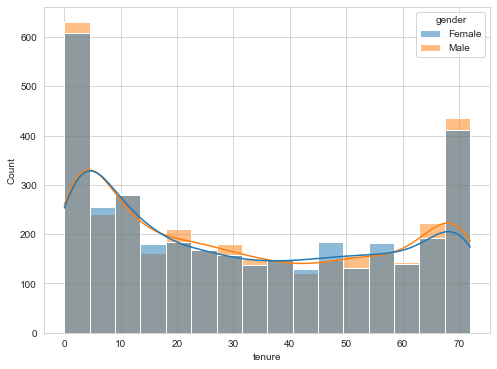

In [33]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.histplot(data=df,x='tenure',hue='gender',kde=True)
print("Top 5 Tenure Counts \n",df['tenure'].value_counts()[:5])

Top 5 Tenure Counts 

- 01     613
- 72    362
- 02     238
- 03     200
- 04     176

### Maximum Frequency lies between 0 to 5 followed by 65 to 70

PhoneService Counts 
 Yes    6361
No      682
Name: PhoneService, dtype: int64


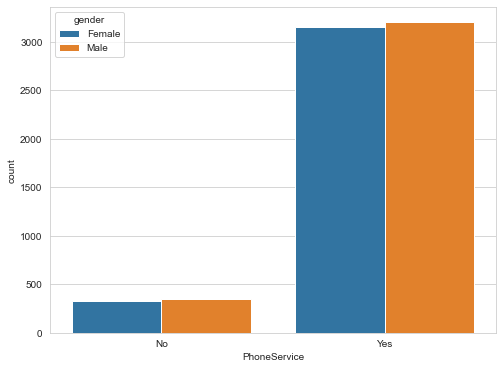

In [34]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='PhoneService',hue='gender')
print("PhoneService Counts \n",df['PhoneService'].value_counts())

### Person counts 6361 Using Phone Service, Person Not using Phone Services are 682

MultipleLines Counts 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


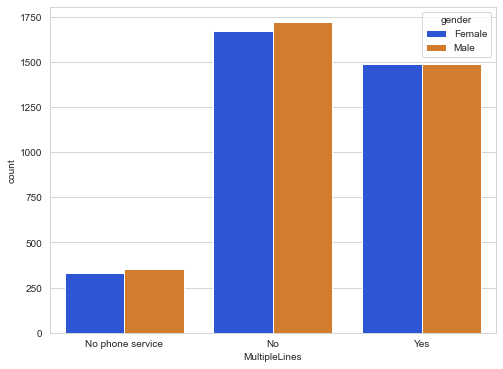

In [35]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")

sns.countplot(data=df,x='MultipleLines',hue='gender',palette='bright',saturation=0.65)
print("MultipleLines Counts \n",df['MultipleLines'].value_counts())

MultipleLines Counts 

- No                  3390
- Yes                 2971
- No phone service     682

### Maximum users are non user of MultipleLines. Maximum Male uses Multiple lines. 

InternetService Counts 
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


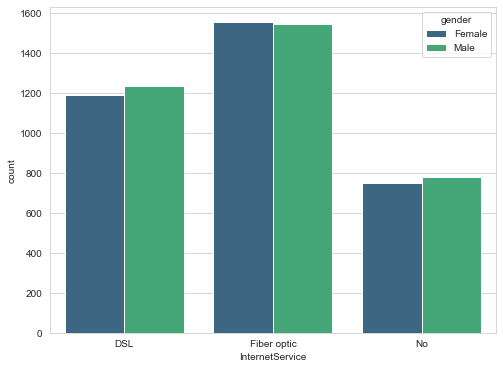

In [36]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")

sns.countplot(data=df,x='InternetService',hue='gender',palette='viridis')
print("InternetService Counts \n",df['InternetService'].value_counts())

Internet Service Users Countss 

- Fiber optic    3096
- DSL            2421
- No             1526

### Maximum user of FIber Optic followed by DSL, Both Male and Female Uses Internet Services 

OnlineSecurity Counts 
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


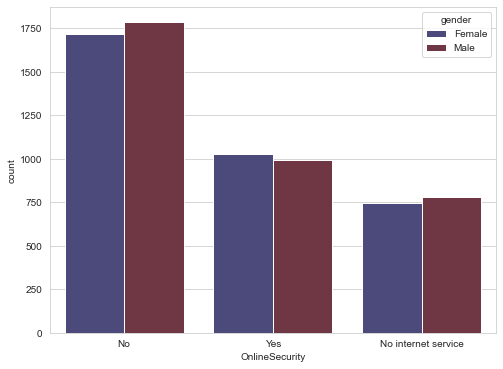

In [37]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='OnlineSecurity',palette='icefire',hue='gender')
print("OnlineSecurity Counts \n",df['OnlineSecurity'].value_counts())

User Using Online Security Shows 
- Non User               3498
- User                   2019
- No internet User       1526

### Maximum are Non User of online Security, Maximum Female User are Online Security User

OnlineBackup Counts 
 No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


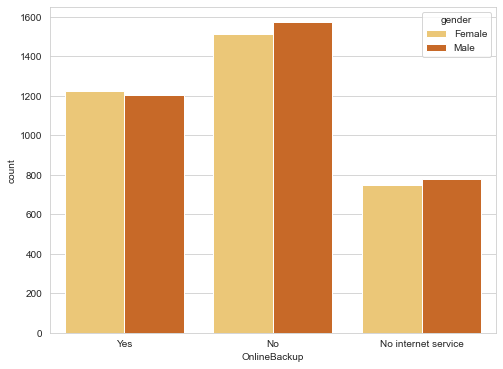

In [38]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='OnlineBackup',palette='YlOrBr',hue='gender')
print("OnlineBackup Counts \n",df['OnlineBackup'].value_counts())

OnlineBackup Counts

- Non User                 3088
- User Using Online Backup 2429
- No internet User         1526

### Maximum User are with No Online Backup, Maximum Female uses Online Backup 

DeviceProtection Counts 
 No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


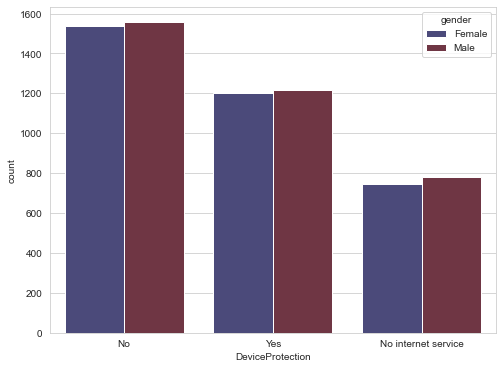

In [39]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='DeviceProtection',palette='icefire',hue='gender')
print("DeviceProtection Counts \n",df['DeviceProtection'].value_counts())

- Non User of Device Protects     3095
- User of Device Protects         2422
- No internet Service User        1526

### Maximum user with No and Yes Device protection is Male

TechSupport Users Counts 
 No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


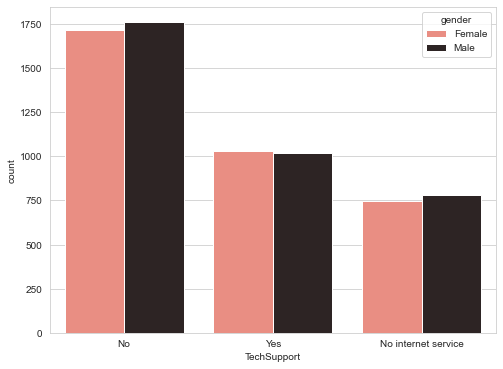

In [40]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='TechSupport',palette='dark:salmon_r',hue='gender')
print("TechSupport Users Counts \n",df['TechSupport'].value_counts())

TechSupport

- Non Tech Support Users   3473
- Tech Support Users       2044
- No internet service      1526

#### Male and Female User Both Uses TechSupport, Uses of Tech Support More By Female

StreamingTV Users Counts 
 No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


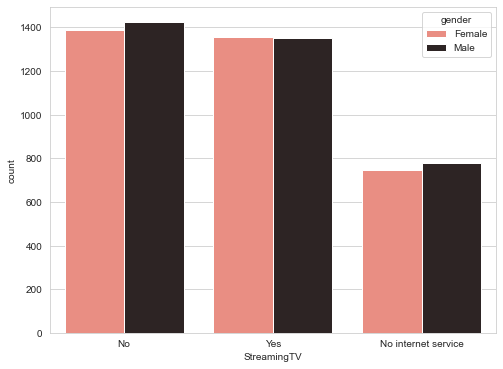

In [41]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='StreamingTV',palette='dark:salmon_r',hue='gender')
print("StreamingTV Users Counts \n",df['StreamingTV'].value_counts())


- Non StreamingTV user      2810
- StreamingTV user          2707
- No internet service user  1526

#### Both Male and Female both uses Streaming TV. Maximum Non user are Male

Streaming Movies Users Counts 
 No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


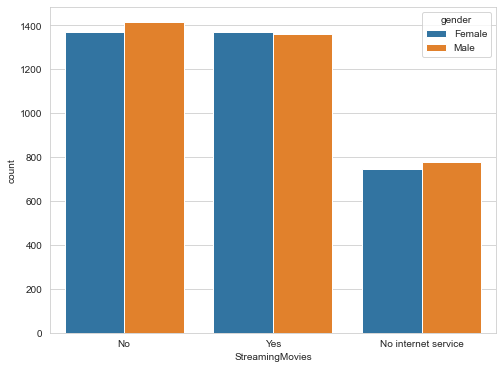

In [42]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='StreamingMovies',hue='gender')
print("Streaming Movies Users Counts \n",df['StreamingMovies'].value_counts())

Streaming Movies Users Counts 
- Non Streaming Movies User    2785
- Streaming Movies User        2732
- No internet service User     1526

### Maximum Streaming Movies are used by Male as well as Female, Maximum NONE user are Male

Contract Users Counts 
 Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


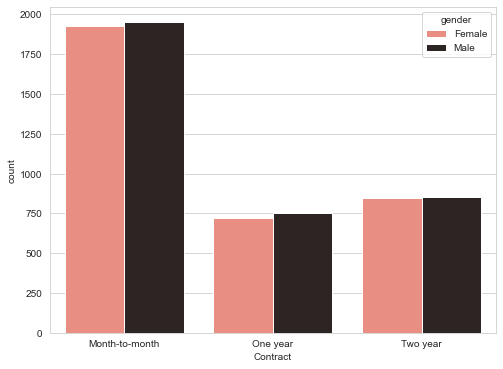

In [43]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='Contract',palette='dark:salmon_r',hue='gender')
print("Contract Users Counts \n",df['Contract'].value_counts())

- Month-to-month Contract Users   3875
- Two year Contract Users         1695
- One year Contract Users         1473

#### Maximum One-year and Month to Month User are Male, Two Years contact are maximum by Male

Paperless Billing Users Counts 
 Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


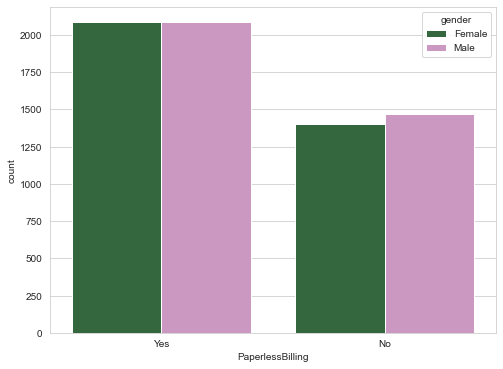

In [44]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='PaperlessBilling',palette='cubehelix',hue='gender')
print("Paperless Billing Users Counts \n",df['PaperlessBilling'].value_counts())

- Paperless Billing Users       4171
- No Paperless Billing Users    2872

#### Both Male and Female User are Paperless billing, None Paperless Billing User are maximum male

Total Charges Users Counts 
 2283.3004408418697


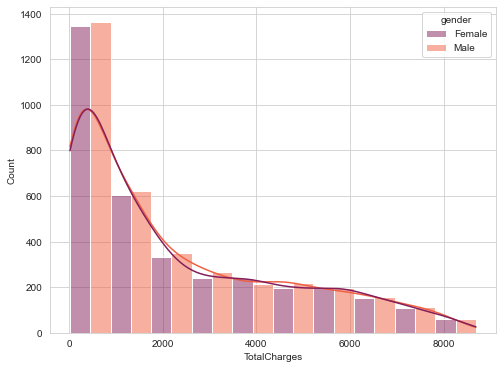

In [46]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.histplot(data=df,x='TotalCharges',palette='rocket',hue='gender',kde=True,multiple='dodge',bins=10)
print("Total Charges Users Counts \n",df['TotalCharges'].mean())

#### Maximum User paying total Charges are between is approx 100, Maximum Buyers pays Total Charges 0 to 2000.

Per Person Sale Stands 2283.3004408418697

# Bi-Variate Analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

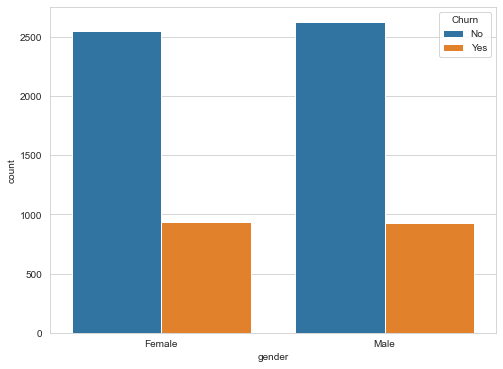

In [47]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='gender',hue='Churn')

Graph Shows Customer is Same for both the customers

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

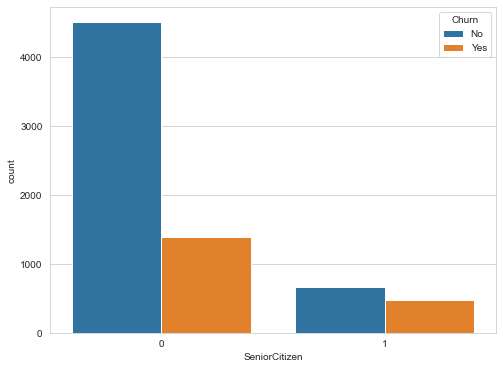

In [48]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='SeniorCitizen',hue='Churn')

Senior Citizen Churn is High as compare to other other customers

<AxesSubplot:xlabel='Partner', ylabel='count'>

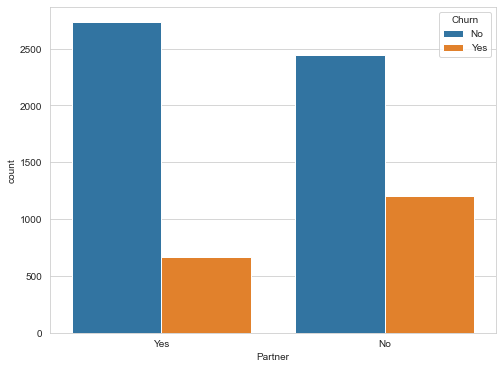

In [49]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='Partner',hue='Churn')

Customers with No partner have high churn

<AxesSubplot:xlabel='Dependents', ylabel='count'>

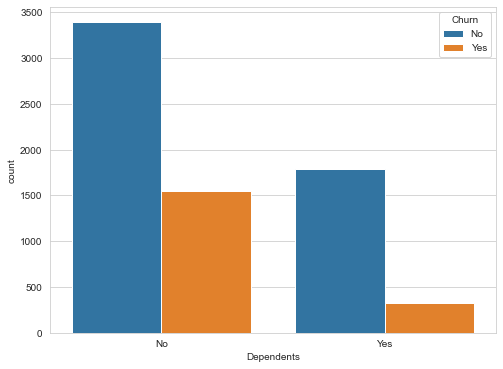

In [50]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='Dependents',hue='Churn')

Dependents have least churn then Non Dependents

<AxesSubplot:xlabel='tenure', ylabel='Count'>

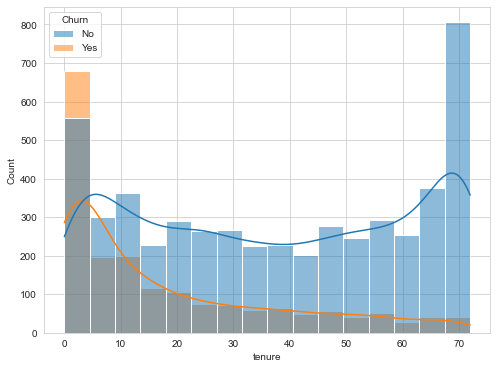

In [52]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.histplot(data=df,x='tenure',hue='Churn',kde=True)

Churn is more for those tenure is less tenure

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

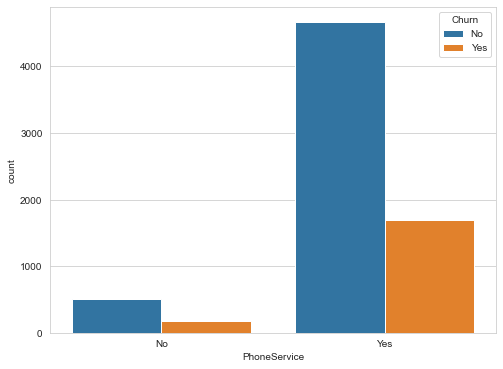

In [54]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='PhoneService',hue='Churn')

Customer Attrition is more who uses Phone Service

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

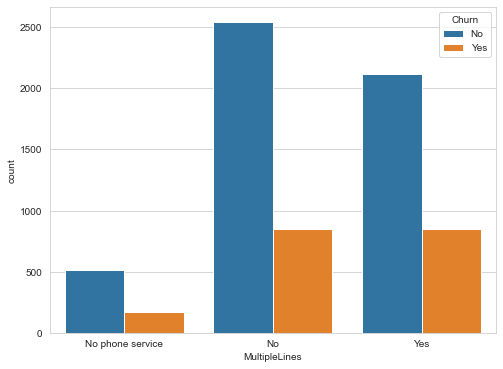

In [53]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='MultipleLines',hue='Churn')

Graph Customer Attrition is more for those who uses MultipleLines have high churn rate, then who don't uses MultipleLines Service

<AxesSubplot:xlabel='InternetService', ylabel='count'>

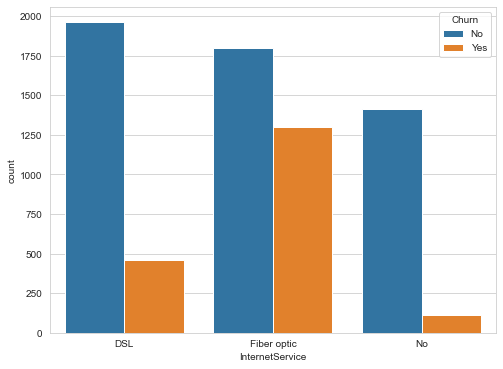

In [54]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='InternetService',hue='Churn')

- Curn is More for Fiber optics users followed by DSL.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

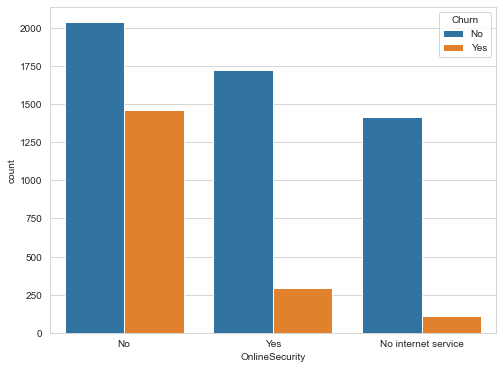

In [55]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='OnlineSecurity',hue='Churn')

- Graph shows less attrition for those who uses Online Security. Maximum Churn lies from those who don't use Online Security

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

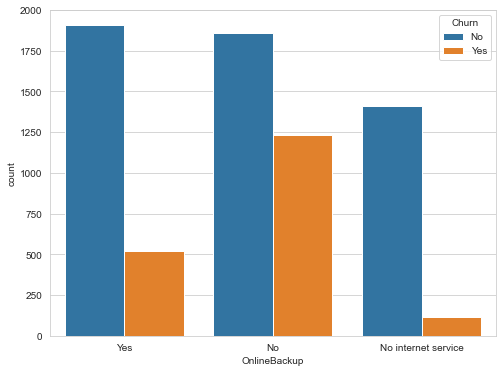

In [56]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='OnlineBackup',hue='Churn')

- Churn Customers are mainly who don't use Online Backup, the one who uses Online Backup is very less and churn is high for None- Backup users.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

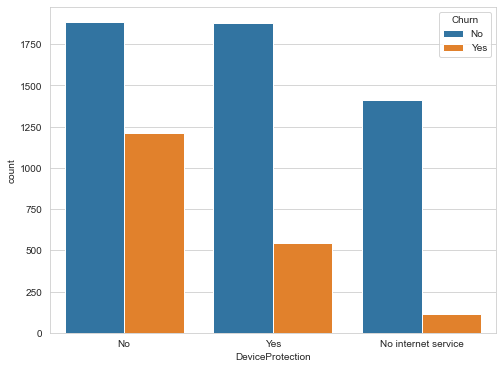

In [57]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='DeviceProtection',hue='Churn')

- Churn Customers are those who don't uses Device Protection, The one who uses Device Protection is very less. Churn rate is also less

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

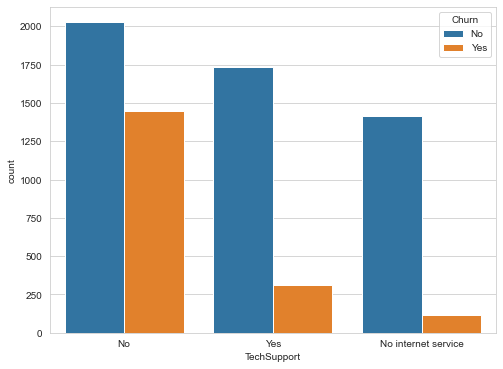

In [58]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='TechSupport',hue='Churn')

- The Customers who is Not a User of Tech Support haves a high Churn rate

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

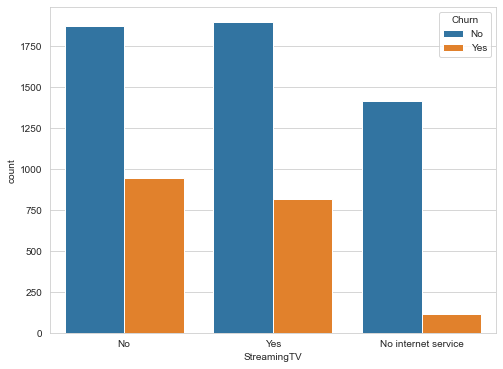

In [59]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='StreamingTV',hue='Churn')

- Churn is high for those customers who don't have Streaming TV on the other hand user who uses streaming tv has high churn rate

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

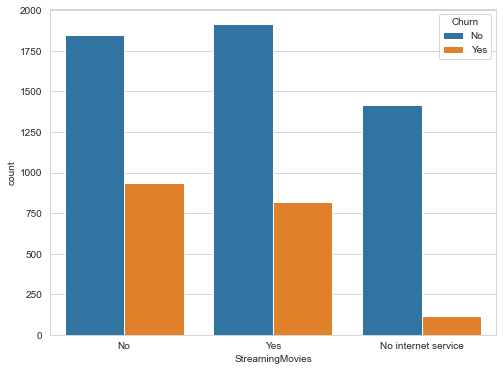

In [60]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='StreamingMovies',hue='Churn')

- The Customers who are Not a User of streaming Movies have high Churn

<AxesSubplot:xlabel='Contract', ylabel='count'>

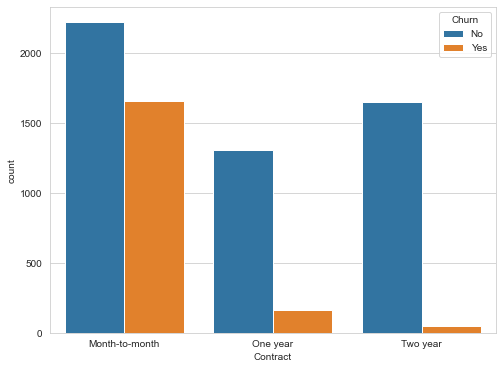

In [61]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='Contract',hue='Churn')

Maximum Customer prefer Month to Month Contact followed but Its Shows high customer Churn

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

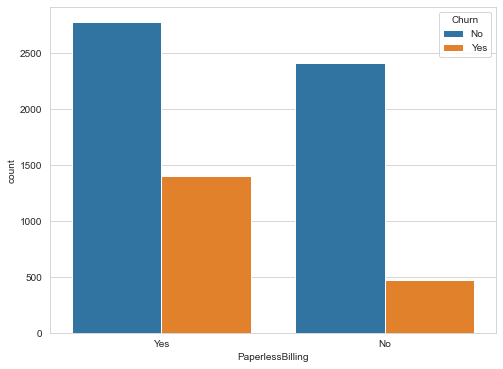

In [62]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='PaperlessBilling',hue='Churn')

Maximum people opt for Paperless Billing. But satisfaction is very less for those customer. These shows High churn

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

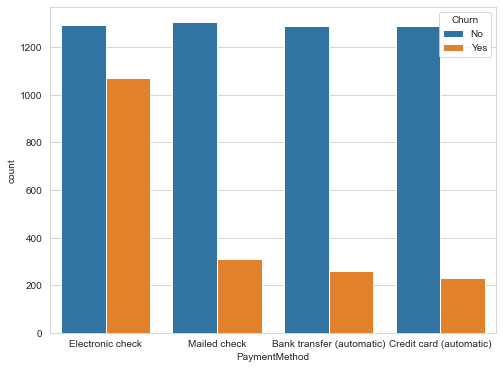

In [63]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='PaymentMethod',hue='Churn')

- Maximum Selects Electronic check method for payments but Churn rate is very High on compare.

## Checking Relationship with Target Variable

### Q1 Churn Percentage

<AxesSubplot:ylabel='Churn'>

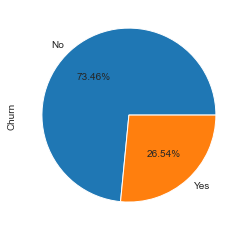

In [64]:
df['Churn'].value_counts().plot(kind='pie', autopct='%.2f%%')

Almost 27 percentage Churn 

### Q2  Churn with Monthly charges

In [65]:
df.groupby(['Churn']).agg(Total_Monthly_Charges=('MonthlyCharges','sum'))

,Total_Monthly_Charges
Churn,
No,316985.75
Yes,139130.85


- Due to churn company making a loss of 1,39,131

<AxesSubplot:ylabel='MonthlyCharges'>

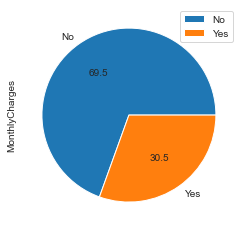

In [73]:
df.groupby(['Churn']).sum().plot(kind='pie',y='MonthlyCharges',autopct='%.1f')

- Approx loss of 31 percentage 

### Q3. Churn Contract with Tenure

In [70]:
df.groupby(['Churn','Contract']).agg(Mean=("tenure","mean"),med_tenure=("tenure","median"))

Mean  med_tenure
Churn Contract                             
No    Month-to-month  21.033333        16.0
      One year        41.674063        43.0
      Two year        56.602914        64.0
Yes   Month-to-month  14.016918         7.0
      One year        44.963855        48.0
      Two year        61.270833        65.5

#### The One on month one Month Contact shows that avarge stay of customer is 7 months

### Q4. Churn,Paperlessbilling,PaymentMethod with PaymentMethod

In [79]:
df.groupby(['Churn','PaperlessBilling','PaymentMethod']).agg(PM_Count = ('PaymentMethod','count')).reset_index()

,Churn,PaperlessBilling,PaymentMethod,PM_Count
0,No,No,Bank transfer (automatic),581
1,No,No,Credit card (automatic),576
2,No,No,Electronic check,419
3,No,No,Mailed check,827
4,No,Yes,Bank transfer (automatic),705
5,No,Yes,Credit card (automatic),714
6,No,Yes,Electronic check,875
7,No,Yes,Mailed check,477
8,Yes,No,Bank transfer (automatic),72
9,Yes,No,Credit card (automatic),64


- High Churn Electronic Check

# Using Label Encoder

In [80]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

for i in df.columns:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

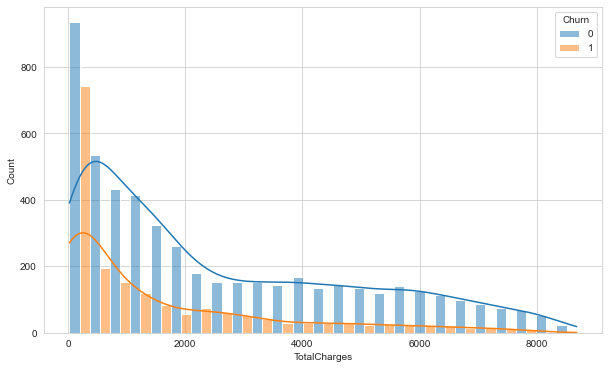

In [81]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='TotalCharges',hue='Churn',kde=True, multiple='dodge')

- Churn is more between 0 to 1000

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

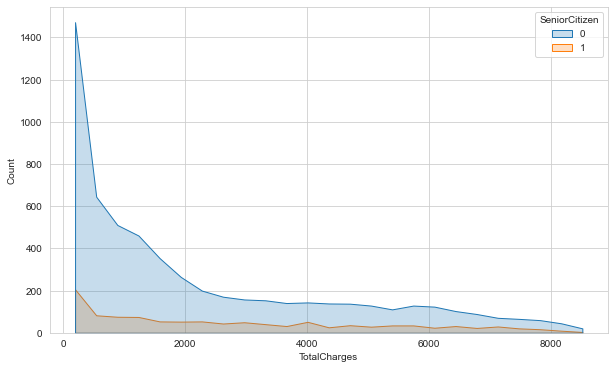

In [83]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,hue='SeniorCitizen',x='TotalCharges',element='poly')

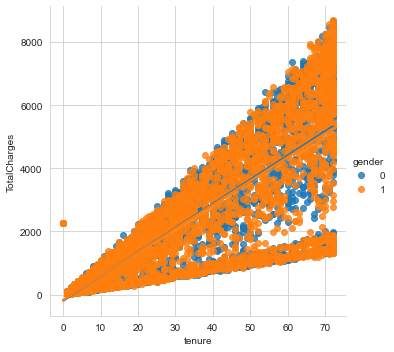

In [86]:
sns.lmplot(data=df,x='tenure',y='TotalCharges',hue='gender')

Shows positive relation with Tenure

# Multivariate Analysis

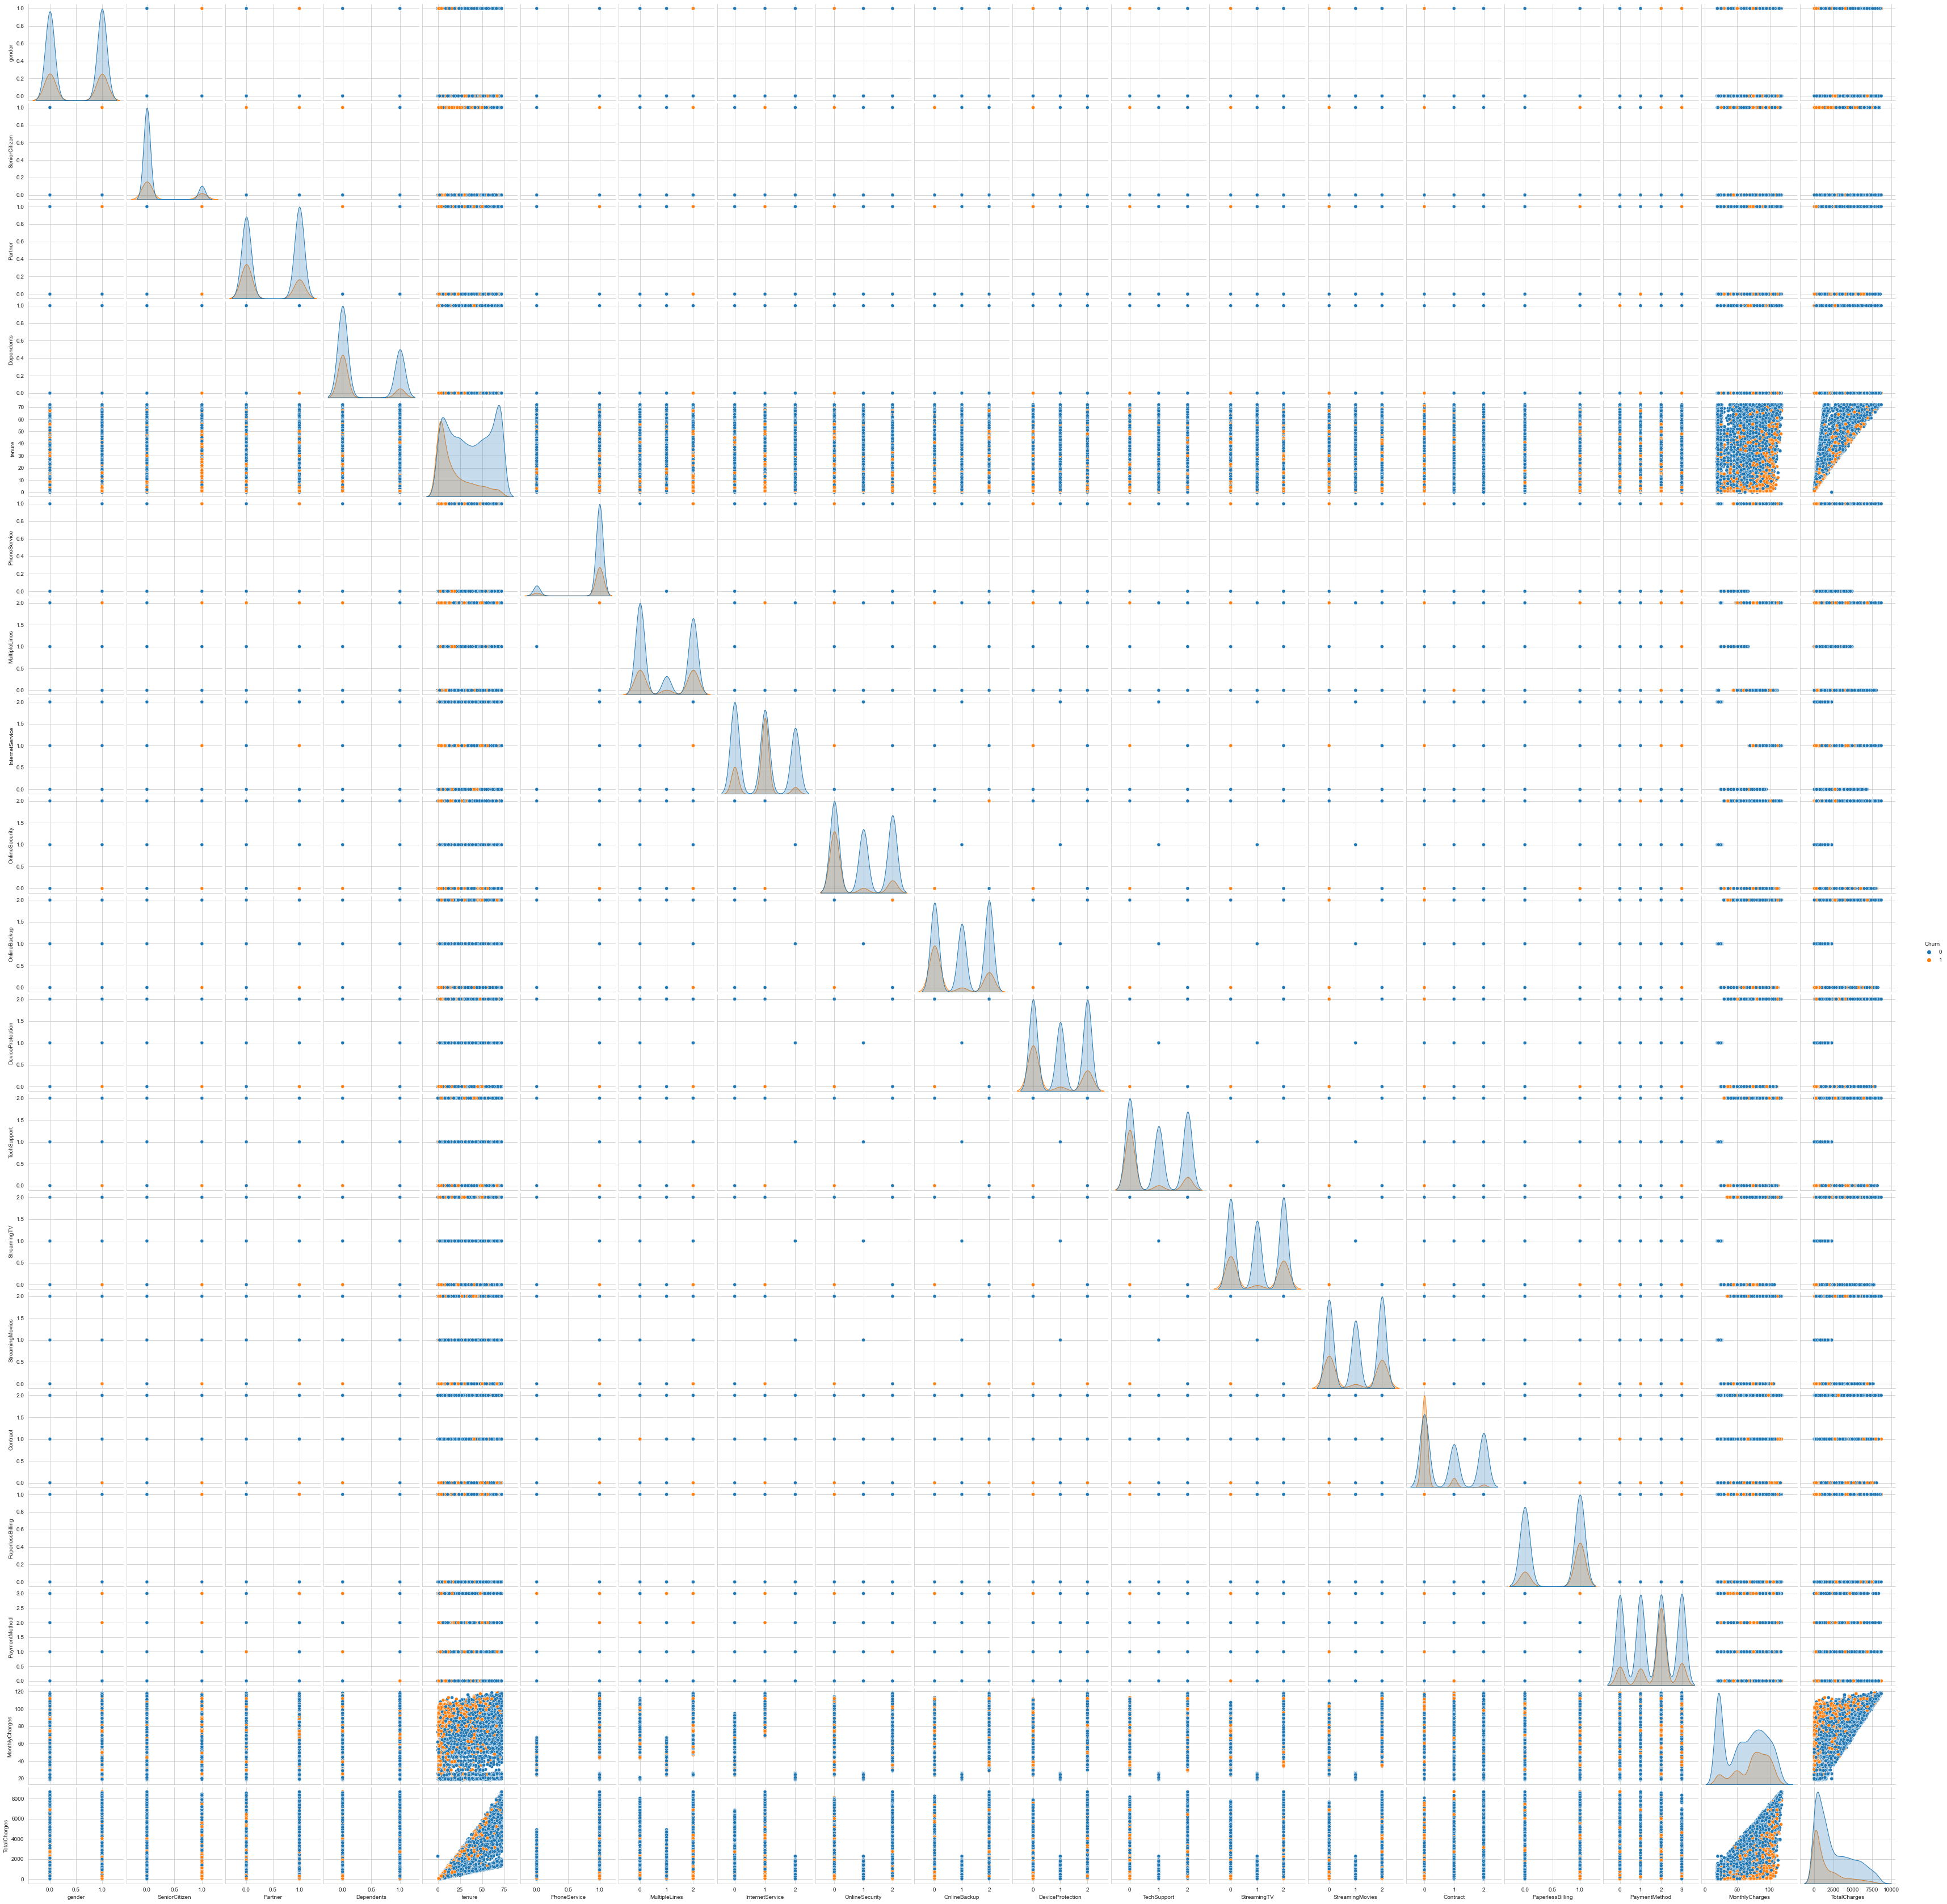

In [85]:
sns.pairplot(data=df,hue='Churn')

# Descriptive Statistics

In [86]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


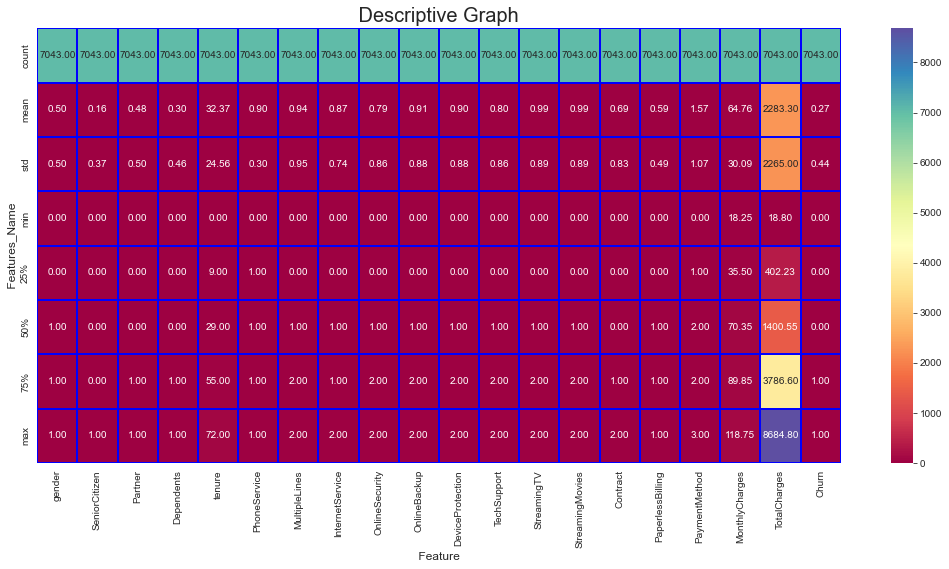

In [87]:
plt.figure(figsize=(18,8))
sns.heatmap(data=df.describe(),annot=True,fmt='0.2f',linecolor='blue',linewidth=0.02,cmap='Spectral')
plt.xlabel(" Feature ", fontsize=12)
plt.ylabel(" Features_Name ",fontsize=12)
plt.title(" Descriptive Graph ",fontsize=20)
plt.show()

# Observation:

- Null value:  No null values
- RightSkewness: tenure,TotalCharges
- Left Skewness: MonthlyCharges,
- Standard Deviation: TotalCharges,MonthlyCharges
- Outliers: TotalCharges,MonthlyCharges

# Correlation Graph

In [88]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


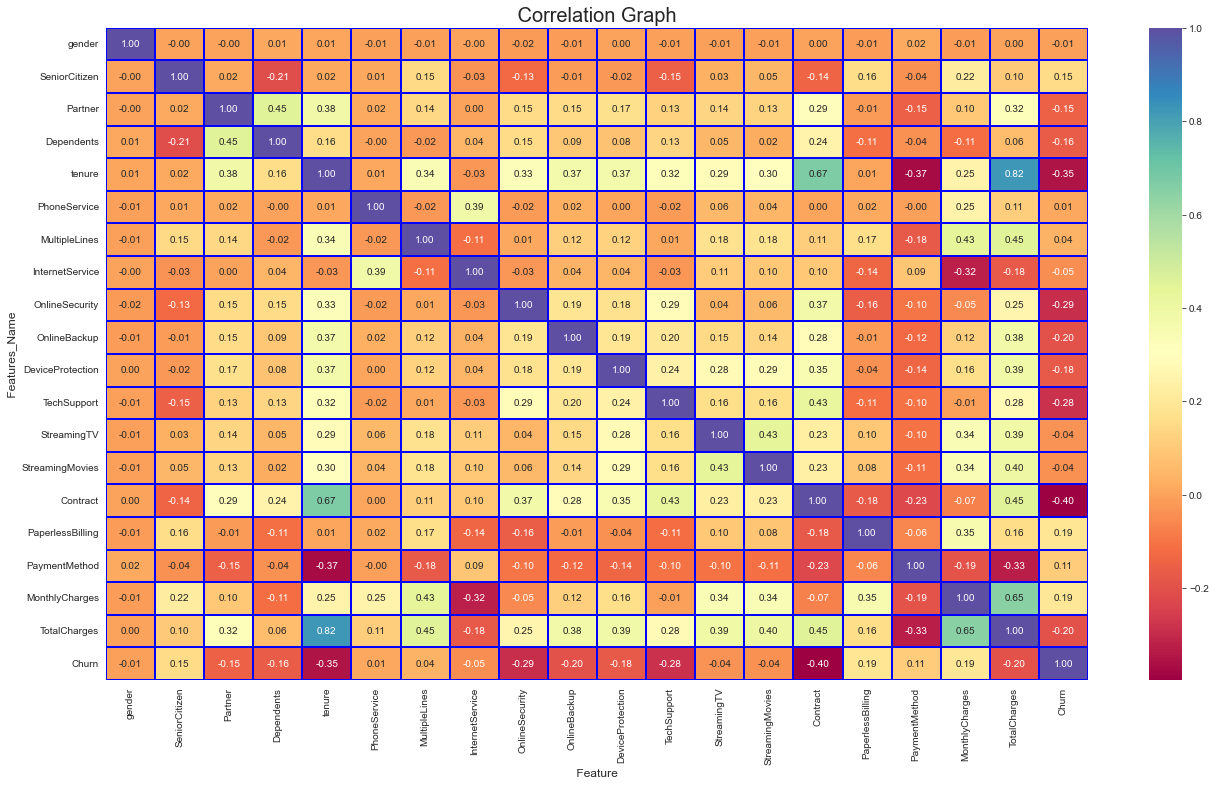

In [89]:
plt.figure(figsize=(22,12))
sns.heatmap(data=df.corr(),annot=True,fmt='0.2f',linecolor='blue',linewidth=0.02,cmap='Spectral')
plt.xlabel(" Feature ", fontsize=12)
plt.ylabel(" Features_Name ",fontsize=12)
plt.title(" Correlation Graph ",fontsize=20)
plt.show()

In [90]:
df.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Correlation Graph')

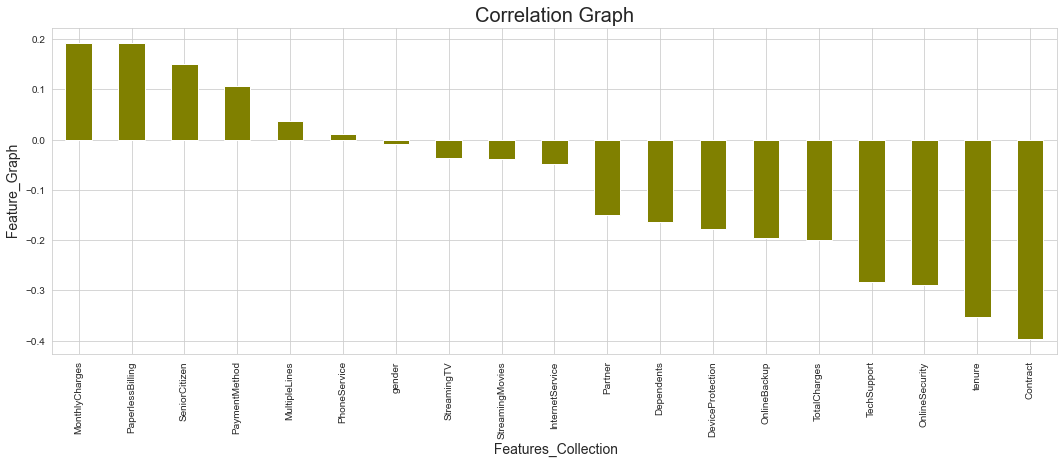

In [91]:
plt.figure(figsize=(18,6))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='olive')
plt.xlabel(" Features_Collection",fontsize=14)
plt.ylabel(" Feature_Graph ",fontsize=14)
plt.title("Correlation Graph",fontsize=20)

# Observation:

- Contract is 39 percentage negatively correlated with the target variable.
- tenure is 35 percentage negatively correlated with the target variable.
- OnlineSecurity is 28 percentage negatively correlated with the target Variable.
- TechSupport is 28 percentage negatively correlated wit target variable.
- TotalCharges is 19 percentage negatively correlated with the target variable.
- OnlineBackup is 19 percentage negatively correlated with the target variable.
- DeviceProtection  is 17 percentage negatively correlated with the target variable.
- Dependents is 16 percentage negatively correlated with the target variable.
- Partner is  15 percentage negatively correlated with the target variable.
- InternetService is 05 percentage negatively correlated with the target variable. 
- StreamingMovies is 04 percentage negatively correlated with target variable.
- StreamingTV is 04 percentage negatively correlated with the target variable.
- gender is 01 percentage negatively correlated with the target variable.
- PhoneService is 01 percentage positively correlated with the target variable.
- MultipleLines is 04 percentage positively correlated with the target variable.
- PaymentMethod is 11 percentage positively correlated with the target variable.
- SeniorCitizen  is 15 percentage positively correlated with the target variable.
- PaperlessBilling is 19 percentage positively correlated with the target variable.
- MonthlyCharges is 19 percentage positively correlated with the target variable.
- Churn is 100 percentafe correlated to own 

### Note:

- Very negatively correlated is contract 39
- MonthlyCharges is 19 percentage positively correlated with the target variable.
- Churn is 100 percentage correlated ((Its a target variable))

# Outliers

<AxesSubplot:xlabel='gender'>

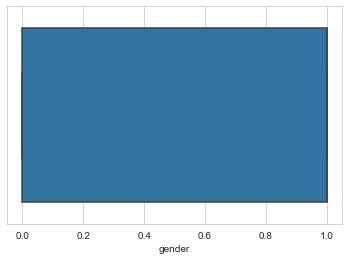

In [92]:
sns.boxplot(x='gender',data=df)

<AxesSubplot:xlabel='SeniorCitizen'>

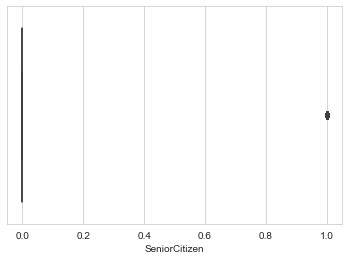

In [93]:
sns.boxplot(x='SeniorCitizen',data=df)

<AxesSubplot:xlabel='Partner'>

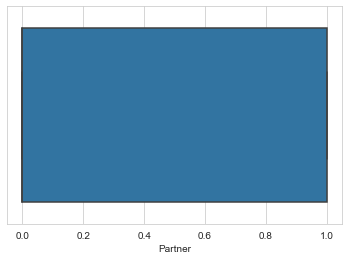

In [94]:
sns.boxplot(x='Partner',data=df)

<AxesSubplot:xlabel='Dependents'>

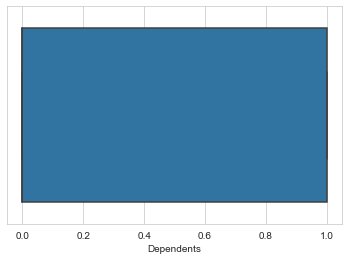

In [95]:
sns.boxplot(x='Dependents',data=df)

<AxesSubplot:xlabel='tenure'>

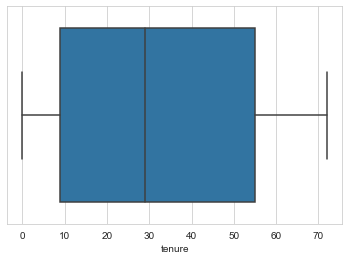

In [96]:
sns.boxplot(x='tenure',data=df)

<AxesSubplot:xlabel='PhoneService'>

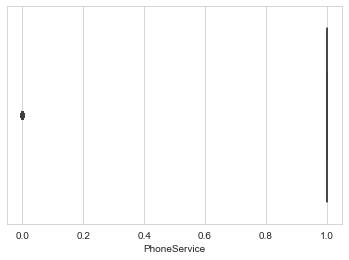

In [97]:
sns.boxplot(x='PhoneService',data=df)

<AxesSubplot:xlabel='MultipleLines'>

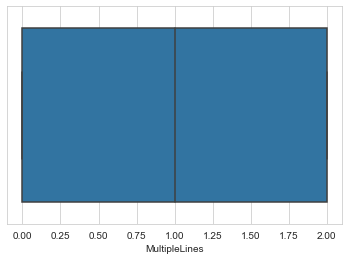

In [98]:
sns.boxplot(x='MultipleLines',data=df)

<AxesSubplot:xlabel='InternetService'>

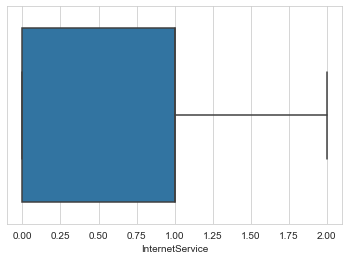

In [99]:
sns.boxplot(x='InternetService',data=df)

<AxesSubplot:xlabel='OnlineSecurity'>

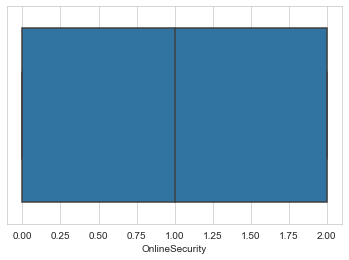

In [100]:
sns.boxplot(x='OnlineSecurity',data=df)

<AxesSubplot:xlabel='OnlineBackup'>

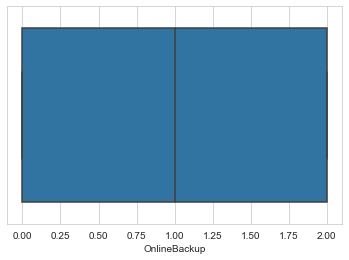

In [101]:
sns.boxplot(x='OnlineBackup',data=df)

<AxesSubplot:xlabel='DeviceProtection'>

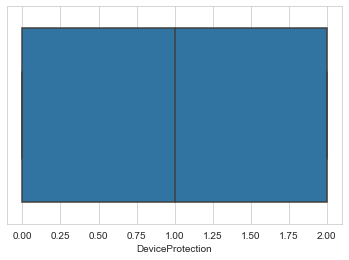

In [102]:
sns.boxplot(x='DeviceProtection',data=df)

<AxesSubplot:xlabel='TechSupport'>

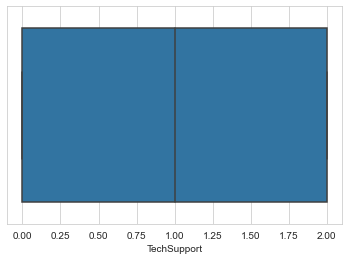

In [103]:
sns.boxplot(x='TechSupport',data=df)

<AxesSubplot:xlabel='StreamingTV'>

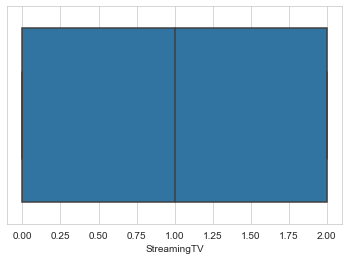

In [104]:
sns.boxplot(x='StreamingTV',data=df)

<AxesSubplot:xlabel='StreamingMovies'>

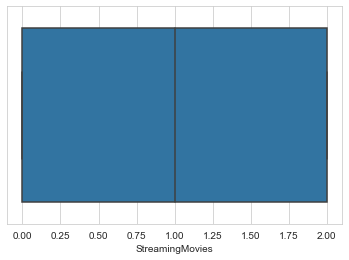

In [105]:
sns.boxplot(x='StreamingMovies',data=df)

<AxesSubplot:xlabel='Contract'>

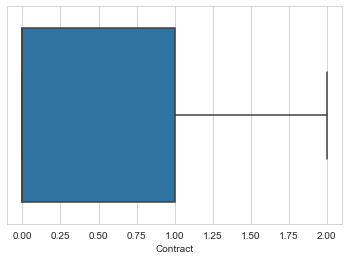

In [106]:
sns.boxplot(x='Contract',data=df)

<AxesSubplot:xlabel='PaperlessBilling'>

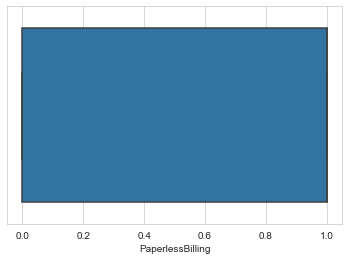

In [107]:
sns.boxplot(x='PaperlessBilling',data=df)

<AxesSubplot:xlabel='PaymentMethod'>

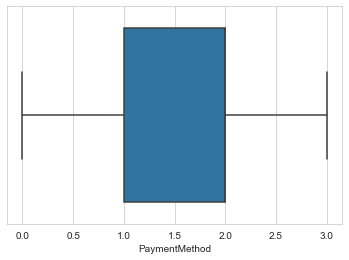

In [108]:
sns.boxplot(x='PaymentMethod',data=df)

<AxesSubplot:xlabel='MonthlyCharges'>

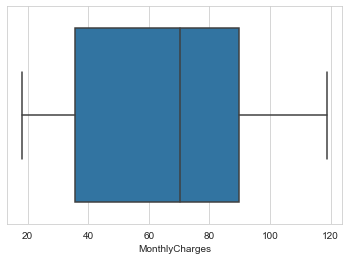

In [109]:
sns.boxplot(x='MonthlyCharges',data=df)

<AxesSubplot:xlabel='TotalCharges'>

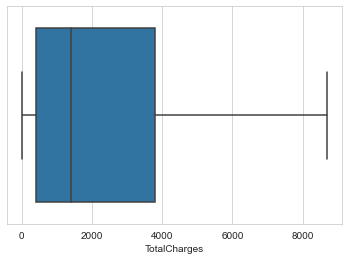

In [110]:
sns.boxplot(x='TotalCharges',data=df)

<AxesSubplot:xlabel='Churn'>

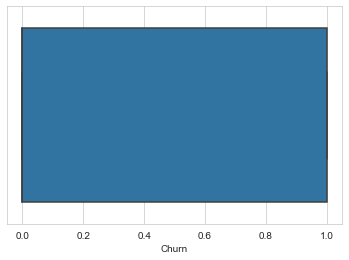

In [111]:
sns.boxplot(x='Churn',data=df)

### Observation:

- SeniorCitizen, PhoneService category variable showing outliers

we don't remove outliers from Category var or target var.

# Skewness

In [112]:
df.skew().sort_values()

PhoneService       -2.727153
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
PaymentMethod      -0.170129
gender             -0.019031
StreamingMovies     0.014657
StreamingTV         0.028486
Partner             0.067922
MultipleLines       0.118719
OnlineBackup        0.182930
DeviceProtection    0.186847
InternetService     0.205423
tenure              0.239540
TechSupport         0.402365
OnlineSecurity      0.416985
Contract            0.630959
Dependents          0.875199
TotalCharges        0.962394
Churn               1.063031
SeniorCitizen       1.833633
dtype: float64

# Observation

Skewness Threshold is taken is(+/-65).

`Outcome shows, Column showing skewness are..

1. PhoneService      ----> -2.727153
2. Dependents        ---->  0.875199
3. TotalCharges      ---->  0.962394
4. Churn             ---->  1.063031
5. SeniorCitizen     ---->  1.833633

<AxesSubplot:xlabel='PhoneService', ylabel='Count'>

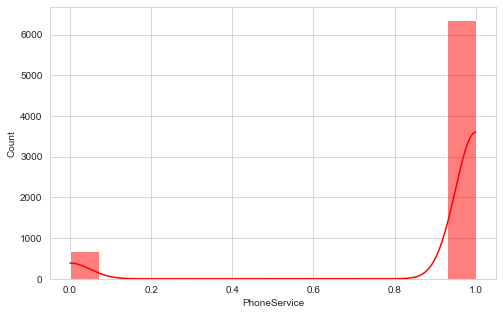

In [113]:
plt.figure(figsize=(8,5))
sns.histplot(df['PhoneService'],color='r',kde=True)

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Bi-Modal)

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

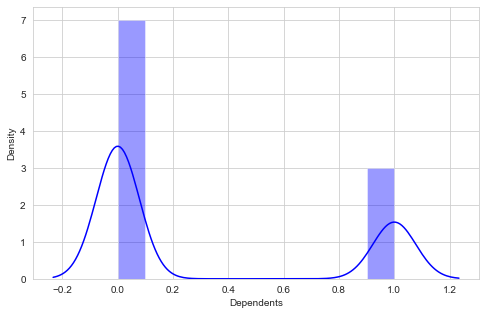

In [114]:
plt.figure(figsize=(8,5))
sns.distplot(df['Dependents'],color='blue',kde=True)

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Bi-Modal)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

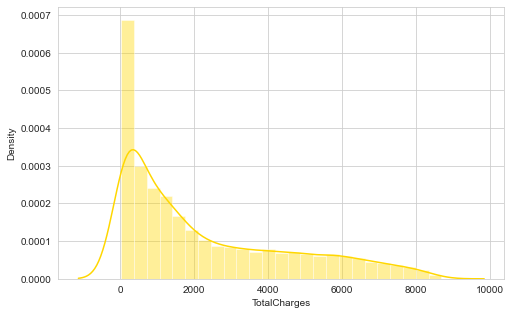

In [115]:
plt.figure(figsize=(8,5))
sns.distplot(df['TotalCharges'],color='gold',kde=True)

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.

<AxesSubplot:xlabel='Churn', ylabel='Density'>

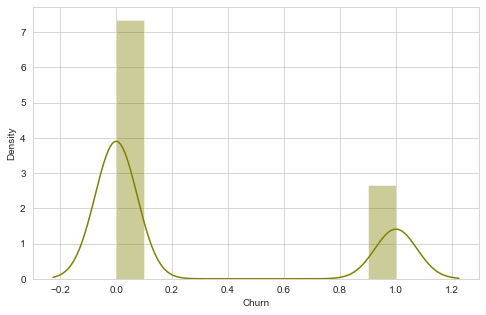

In [116]:
plt.figure(figsize=(8,5))
sns.distplot(df['Churn'],color='olive',kde=True)

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Bi-Modal)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

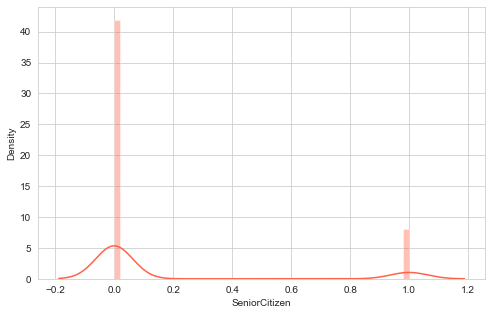

In [117]:
plt.figure(figsize=(8,5))
sns.distplot(df['SeniorCitizen'],color='Tomato',kde=True)

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Bi-Modal)

# Cleaning Data :

## 1. Correlation 

In [118]:
df.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

In [119]:
delete=pd.DataFrame(data={"Column":['Contract','gender','PhoneService'],"Values":[-0.396713,-0.008612,0.011942],
                         "Outliers":['NO','NO','NO'],
                         "Normalised":['No','No','Yes']})
delete

,Column,Values,Outliers,Normalised
0,Contract,-0.396713,NO,No
1,gender,-0.008612,NO,No
2,PhoneService,0.011942,NO,Yes


In [120]:
# Deleting these columns as relation is near to zero.
df.drop(['Contract','gender','PhoneService'],axis=1,inplace=True)

In [121]:
df.corr()['Churn'].sort_values()

tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

# 2. Removing Outliers Zscore

In [122]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [123]:
z.head(3)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.439916,1.034530,0.654012,1.277445,0.062723,1.183234,0.918838,1.242550,1.027910,0.925262,1.113495,1.121405,0.829798,0.398558,1.160323,0.994971,0.601023
1,0.439916,0.966622,0.654012,0.066327,0.991588,1.183234,1.407321,1.029919,1.245111,0.925262,1.113495,1.121405,1.205113,1.334863,0.259629,0.173876,0.601023
2,0.439916,0.966622,0.654012,1.236724,0.991588,1.183234,1.407321,1.242550,1.027910,0.925262,1.113495,1.121405,0.829798,1.334863,0.362660,0.960399,1.663829


In [124]:
# Here threshold is 3, checking values where z>3

np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

In [125]:
# No removal as no order shows outliers. we will continue with old df

In [126]:
# copying df to to new df as back up purpose

new_df=pd.DataFrame(data=df)

In [127]:
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

In [128]:
x.head(5)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,1,0,0,2,0,0,0,0,1,2,29.85,29.85
1,0,0,0,34,0,0,2,0,2,0,0,0,0,3,56.95,1889.50
2,0,0,0,2,0,0,2,2,0,0,0,0,1,3,53.85,108.15
3,0,0,0,45,1,0,2,0,2,2,0,0,0,0,42.30,1840.75
4,0,0,0,2,0,1,0,0,0,0,0,0,1,2,70.70,151.65


In [129]:
y.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [130]:
print("Shape of X ",x.shape," Shape of Y ",y.shape)

Shape of X  (7043, 16)  Shape of Y  (7043,)


# 3. Removing Skewness

In [131]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

x=pt.fit_transform(x)

In [132]:
x

array([[-0.43991649,  1.03453023, -0.65401193, ...,  0.40968472,
        -1.1585412 , -1.81058786],
       [-0.43991649, -0.96662231, -0.65401193, ...,  1.31889872,
        -0.23949171,  0.25331304],
       [-0.43991649, -0.96662231, -0.65401193, ...,  1.31889872,
        -0.34266505, -1.38726921],
       ...,
       [-0.43991649,  1.03453023,  1.5290241 , ...,  0.40968472,
        -1.16724064, -0.85989943],
       [ 2.27315869,  1.03453023, -0.65401193, ...,  1.31889872,
         0.33431207, -0.92296815],
       [-0.43991649, -0.96662231, -0.65401193, ..., -1.48983732,
         1.33886338,  1.48444325]])

In [133]:
x=pd.DataFrame(data=x,columns=['SeniorCitizen','Partner','Dependents','tenure','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges'])

In [134]:
x.skew().sort_values()

PaperlessBilling   -0.375396
MonthlyCharges     -0.259035
tenure             -0.243325
PaymentMethod      -0.207559
TotalCharges       -0.144899
StreamingMovies    -0.105641
StreamingTV        -0.097211
InternetService    -0.072384
OnlineBackup       -0.001417
DeviceProtection    0.001051
MultipleLines       0.033697
Partner             0.067922
TechSupport         0.139751
OnlineSecurity      0.149362
Dependents          0.875199
SeniorCitizen       1.833633
dtype: float64

In [135]:
# dropping rows with high skewness
x.drop(['SeniorCitizen','Dependents'],axis=1,inplace=True)

In [136]:
x.skew()

Partner             0.067922
tenure             -0.243325
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.144899
dtype: float64

# Using Standard Scaler

In [137]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

x=ss.fit_transform(x)

In [138]:
x

array([[ 1.03453023, -1.6443435 ,  0.33458513, ...,  0.40968472,
        -1.1585412 , -1.81058786],
       [-0.96662231,  0.29720527, -1.01501452, ...,  1.31889872,
        -0.23949171,  0.25331304],
       [-0.96662231, -1.49544443, -1.01501452, ...,  1.31889872,
        -0.34266505, -1.38726921],
       ...,
       [ 1.03453023, -0.72512119,  0.33458513, ...,  0.40968472,
        -1.16724064, -0.85989943],
       [ 1.03453023, -1.26512968,  1.08135717, ...,  1.31889872,
         0.33431207, -0.92296815],
       [-0.96662231,  1.20189603, -1.01501452, ..., -1.48983732,
         1.33886338,  1.48444325]])

In [139]:
print(" Mean ",round(x.mean(),2)," Standard Deviation ",round(x.std(),2))

 Mean  0.0  Standard Deviation  1.0


# Principle Component Analysis

from sklearn.decomposition import PCA
pca=PCA(n_components=7)

x=pca.fit_transform(x)

##### Not working good to accuracy Score

# Checking Target variable

<AxesSubplot:xlabel='Churn', ylabel='count'>

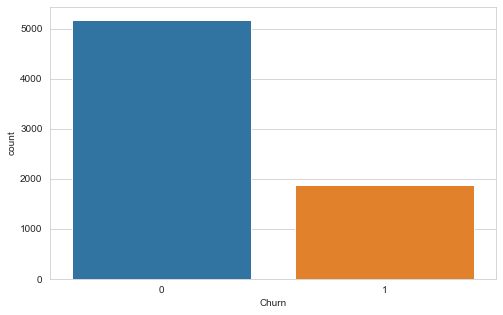

In [140]:
plt.figure(figsize=(8,5))
sns.countplot(x=y)

In [141]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [142]:
x,y=smt.fit_resample(x,y)

0    5174
1    5174
Name: Churn, dtype: int64

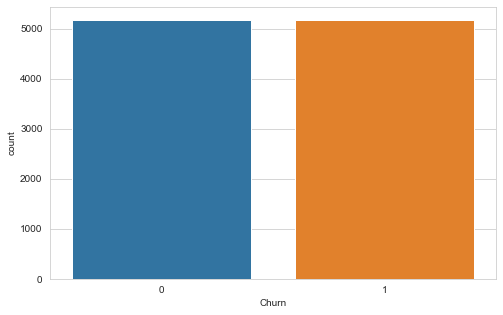

In [143]:
plt.figure(figsize=(8,5))
sns.countplot(x=y)
y.value_counts()

#  IMPORTING Model:

In [144]:
# linear_model,train test and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Clssifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# cross Validation
from sklearn.model_selection import cross_val_score

# Ensamble
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# neural network
from sklearn.neural_network import MLPClassifier

# hyper paramter
from sklearn.model_selection import GridSearchCV

In [145]:
# Instances :
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
gnb=GaussianNB()
svc=SVC()
sgd=SGDClassifier()
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
mlp=MLPClassifier()

# Model Selection

In [146]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    #train and score
    lg.fit(x_train,y_train)
    lg.score(x_train,y_train)
    
    #predict train and test
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    
    # loop
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("The random state:-",i)
        print("Training accuracy_score is ",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is ",accuracy_score(y_test,pred_test)*100,"\n")

The random state:- 5
Training accuracy_score is  76.8301522106789
Testing accuracy_score is  76.7632850241546 

The random state:- 12
Training accuracy_score is  76.8301522106789
Testing accuracy_score is  76.81159420289855 

The random state:- 13
Training accuracy_score is  76.73351050978498
Testing accuracy_score is  76.71497584541062 

The random state:- 16
Training accuracy_score is  76.7697511476202
Testing accuracy_score is  76.7632850241546 

The random state:- 21
Training accuracy_score is  76.58854795844407
Testing accuracy_score is  76.57004830917874 

The random state:- 35
Training accuracy_score is  76.74559072239671
Testing accuracy_score is  76.66666666666667 

The random state:- 41
Training accuracy_score is  76.75767093500846
Testing accuracy_score is  76.81159420289855 

The random state:- 55
Training accuracy_score is  76.80599178545542
Testing accuracy_score is  76.7632850241546 

The random state:- 68
Training accuracy_score is  76.63686880889104
Testing accuracy_sc

#### Slected Random State is 49 as training score is close to testing Score

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=69,test_size=0.20)

#sent for training
lg.fit(x_train,y_train)

#predict(x_training data)
pred_train=lg.predict(x_train) 
pred_test=lg.predict(x_test) 

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),'\n',"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test),"\n")
print("Classification Report \n",classification_report(y_test,pred_test),'\n\n')

Accuracy Training Score = 0.769147136989611  Accuracy Test Score = 0.7685990338164251 

Training Confusion_Matrix 
 [[3141  973]
 [ 938 3226]] 
 Testing Confusion_Matrix 
 [[814 246]
 [233 777]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.77      0.77      1060
           1       0.76      0.77      0.76      1010

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070
 




## Model Cross Validation:

In [148]:
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

for i in range(2,10):
    cv_score=cross_val_score(lg,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7653652879783532 Training Score  0.769147136989611 Testing Score  0.7685990338164251
A cross-fold  3 CV_mean  0.7657528962396158 Training Score  0.769147136989611 Testing Score  0.7685990338164251
A cross-fold  4 CV_mean  0.7658484731349053 Training Score  0.769147136989611 Testing Score  0.7685990338164251
A cross-fold  5 CV_mean  0.7664300941200095 Training Score  0.769147136989611 Testing Score  0.7685990338164251
A cross-fold  6 CV_mean  0.7658505665960523 Training Score  0.769147136989611 Testing Score  0.7685990338164251
A cross-fold  7 CV_mean  0.7668160353591299 Training Score  0.769147136989611 Testing Score  0.7685990338164251
A cross-fold  8 CV_mean  0.7666248590974346 Training Score  0.769147136989611 Testing Score  0.7685990338164251
A cross-fold  9 CV_mean  0.7668174383942349 Training Score  0.769147136989611 Testing Score  0.7685990338164251


### Selected Cross Val 9 as CV_Score is close to Testing Score

In [149]:
# accuracy score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#score and mean
cv_score =cross_val_score(lg,x,y,cv=9)
cv_mean  =cv_score.mean()

# result
print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  9 CV_mean  0.7668174383942349 Training Score  0.769147136989611 Testing Score  0.7685990338164251


### AUC_ROC_Graph

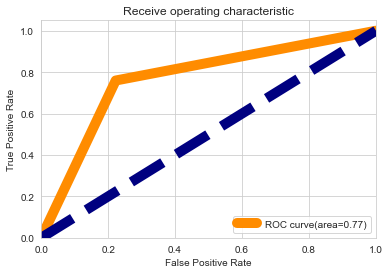

In [150]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model 1. Decision Tree

In [151]:
#train and score
dtc.fit(x_train,y_train)
dtc_score=dtc.score(x_train,y_train)

#predict
pred_train=dtc.predict(x_train)
pred_test=dtc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Accuracy Training Score = 0.9975839574776516  Accuracy Test Score = 0.7845410628019324 

Training Confusion_Matrix 
 [[4111    3]
 [  17 4147]] Testing Confusion_Matrix 
 [[827 233]
 [213 797]]
Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1060
           1       0.77      0.79      0.78      1010

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



### Model Cross Validation

In [152]:
#train test Accuracy
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

#Range finding cv Score
for i in range(2,10):
    cv_score=cross_val_score(dtc,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.751449555469656 Training Score  0.9975839574776516 Testing Score  0.7845410628019324
A cross-fold  3 CV_mean  0.7615039856122968 Training Score  0.9975839574776516 Testing Score  0.7845410628019324
A cross-fold  4 CV_mean  0.7647854657904909 Training Score  0.9975839574776516 Testing Score  0.7845410628019324
A cross-fold  5 CV_mean  0.768077509497225 Training Score  0.9975839574776516 Testing Score  0.7845410628019324
A cross-fold  6 CV_mean  0.7749398096775278 Training Score  0.9975839574776516 Testing Score  0.7845410628019324
A cross-fold  7 CV_mean  0.7687563383339431 Training Score  0.9975839574776516 Testing Score  0.7845410628019324
A cross-fold  8 CV_mean  0.7730110474783372 Training Score  0.9975839574776516 Testing Score  0.7845410628019324
A cross-fold  9 CV_mean  0.7711720756969933 Training Score  0.9975839574776516 Testing Score  0.7845410628019324


#### Model Cross Validation selected is 6 as test and cv score is closeby

In [153]:
# accuracy score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#score and mean
cv_score =cross_val_score(dtc,x,y,cv=6)
cv_mean  =cv_score.mean()

# result
print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  9 CV_mean  0.7730066579239382 Training Score  0.9975839574776516 Testing Score  0.7845410628019324


### AOC_ROC_Graph

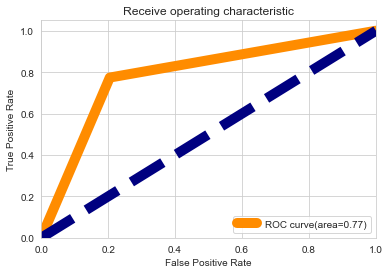

In [154]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_curve=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model 2: KNeighbors Classifier

In [155]:
# train and score
knc.fit(x_train,y_train)
knc_score=knc.score(x_train,y_train)

#predict
pred_train= knc.predict(x_train)
pred_test = knc.predict(x_test)

#result
print("Training Score",knc_score)
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"\n","Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Training Score 0.8539502295240397
Accuracy Training Score = 0.8539502295240397  Accuracy Test Score = 0.7835748792270532 

Training Confusion_Matrix 
 [[3257  857]
 [ 352 3812]] 
 Testing Confusion_Matrix 
 [[764 296]
 [152 858]]
Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.72      0.77      1060
           1       0.74      0.85      0.79      1010

    accuracy                           0.78      2070
   macro avg       0.79      0.79      0.78      2070
weighted avg       0.79      0.78      0.78      2070



### Model Cross Validation

In [156]:
#accuracy
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

#range for cv 
for i in range(2,10):
    cv_score=cross_val_score(knc,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7810204870506379 Training Score  0.8539502295240397 Testing Score  0.7835748792270532
A cross-fold  3 CV_mean  0.7900105190470388 Training Score  0.8539502295240397 Testing Score  0.7835748792270532
A cross-fold  4 CV_mean  0.7860456126787785 Training Score  0.8539502295240397 Testing Score  0.7835748792270532
A cross-fold  5 CV_mean  0.7891414321838598 Training Score  0.8539502295240397 Testing Score  0.7835748792270532
A cross-fold  6 CV_mean  0.7918465090733829 Training Score  0.8539502295240397 Testing Score  0.7835748792270532
A cross-fold  7 CV_mean  0.7917543201313001 Training Score  0.8539502295240397 Testing Score  0.7835748792270532
A cross-fold  8 CV_mean  0.7899181599649043 Training Score  0.8539502295240397 Testing Score  0.7835748792270532
A cross-fold  9 CV_mean  0.7918460497050576 Training Score  0.8539502295240397 Testing Score  0.7835748792270532


#### Model Cross Validation selected is 9 as test and cv score is closeby

In [157]:
#accuracy
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

#cross val score(K_neighbors)
knc_cv_score=cross_val_score(knc,x,y,cv=9) # cv_score is near to training score
knc_mean=knc_cv_score.mean()

#predict result
print(" Cross Validation_mean ",knc_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

 Cross Validation_mean  0.7918460497050576 Training Score  0.8539502295240397 Testing Score  0.7835748792270532


### AUC_ROC_Graph

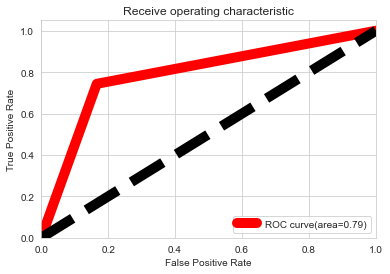

In [158]:
## AOC ROC score curve 
from sklearn.metrics import roc_curve

fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc =auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='red',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model 3: SVC (Support Vector Machine)

In [159]:
#train and score
svc.fit(x_train,y_train)
svc_score=svc.score(x_train,y_train)

# predict
pred_train=svc.predict(x_train)
pred_test=svc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Accuracy Training Score = 0.8126359023918821  Accuracy Test Score = 0.7980676328502415 

Training Confusion_Matrix 
 [[3174  940]
 [ 611 3553]] Testing Confusion_Matrix 
 [[820 240]
 [178 832]]
Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.77      0.80      1060
           1       0.78      0.82      0.80      1010

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



### Model Cross Validation

In [160]:
#score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val 
for i in range(2,10):
    cv_svc_score=cross_val_score(svc,x,y,cv=i)
    cv_mean=cv_svc_score.mean() 
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7830498647081561 Training Score  0.8126359023918821 Testing Score  0.7980676328502415
A cross-fold  3 CV_mean  0.7851774161242564 Training Score  0.8126359023918821 Testing Score  0.7980676328502415
A cross-fold  4 CV_mean  0.7868187089292616 Training Score  0.8126359023918821 Testing Score  0.7980676328502415
A cross-fold  5 CV_mean  0.7896236367075041 Training Score  0.8126359023918821 Testing Score  0.7980676328502415
A cross-fold  6 CV_mean  0.7898171312642209 Training Score  0.8126359023918821 Testing Score  0.7980676328502415
A cross-fold  7 CV_mean  0.7900115764657782 Training Score  0.8126359023918821 Testing Score  0.7980676328502415
A cross-fold  8 CV_mean  0.7906891644582469 Training Score  0.8126359023918821 Testing Score  0.7980676328502415
A cross-fold  9 CV_mean  0.7903014173215103 Training Score  0.8126359023918821 Testing Score  0.7980676328502415


#### Selected Cross Fold 8, As Model Testing Score and Cross Validation Score is nearby.

In [161]:
#accuracy score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

#cross val score
svc_cv_score=cross_val_score(svc,x,y,cv=8)
svc_mean=svc_cv_score.mean()

print(" CV_mean ",svc_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

 CV_mean  0.7906891644582469 Training Score  0.8126359023918821 Testing Score  0.7980676328502415


#### Model AUC ROC Graph

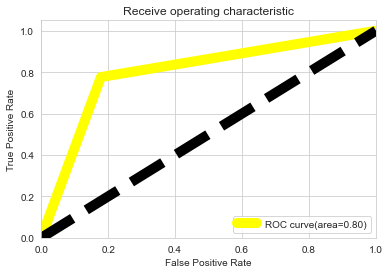

In [162]:
## AOC ROC score curve 
from sklearn.metrics import roc_curve

fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc =auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='yellow',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model 4. Naive_bayes

In [163]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

#train and score
gnb.fit(x_train,y_train)
gnb_score=gnb.score(x_train,y_train)

# predict
pred_train=gnb.predict(x_train)
pred_test=gnb.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.7457115245228316  Accuracy Test Score = 0.748792270531401 

Training Confusion_Matrix 
 [[3087 1027]
 [1078 3086]] Testing Confusion_Matrix 
 [[791 269]
 [251 759]]
Classification Report 
               precision    recall  f1-score   support

           0       0.76      0.75      0.75      1060
           1       0.74      0.75      0.74      1010

    accuracy                           0.75      2070
   macro avg       0.75      0.75      0.75      2070
weighted avg       0.75      0.75      0.75      2070



# Model Cross Validation

In [164]:
#score
gnb_train=accuracy_score(y_train,pred_train)
gnb_test=accuracy_score(y_test,pred_test)

#cross val 
for i in range(2,10):
    cv_gnb_score=cross_val_score(gnb,x,y,cv=i)
    cv_mean=cv_gnb_score.mean()    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",gnb_train,"Testing Score ",gnb_test)

A cross-fold  2 CV_mean  0.7451681484344801 Training Score  0.7457115245228316 Testing Score  0.748792270531401
A cross-fold  3 CV_mean  0.7454584189494119 Training Score  0.7457115245228316 Testing Score  0.748792270531401
A cross-fold  4 CV_mean  0.7457479706223424 Training Score  0.7457115245228316 Testing Score  0.748792270531401
A cross-fold  5 CV_mean  0.7454586336604535 Training Score  0.7457115245228316 Testing Score  0.748792270531401
A cross-fold  6 CV_mean  0.7457487362274007 Training Score  0.7457115245228316 Testing Score  0.748792270531401
A cross-fold  7 CV_mean  0.7458442945093673 Training Score  0.7457115245228316 Testing Score  0.748792270531401
A cross-fold  8 CV_mean  0.7455564142194745 Training Score  0.7457115245228316 Testing Score  0.748792270531401
A cross-fold  9 CV_mean  0.7459413983173775 Training Score  0.7457115245228316 Testing Score  0.748792270531401


#### Selected Cross Fold 9, As Model Testing Score and Cross Validation Score is nearby.

In [165]:
#score
gnb_train=accuracy_score(y_train,pred_train)
gnb_test=accuracy_score(y_test,pred_test)

#cross val score
cv_gnb_score=cross_val_score(gnb,x,y,cv=9)
gnb_mean=cv_gnb_score.mean()

print(" CV_mean ",gnb_mean,"Training Score ",gnb_train,"Testing Score ",gnb_test)

 CV_mean  0.7459413983173775 Training Score  0.7457115245228316 Testing Score  0.748792270531401


### Model AUC_ROC_Graph

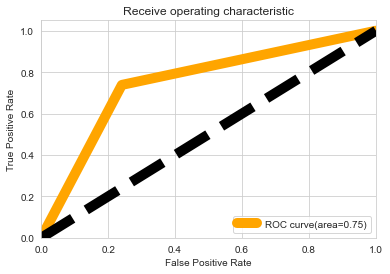

In [166]:
## AOC ROC score curve 
from sklearn.metrics import roc_curve

fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc =auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Ensamble Technique

## Model1 Extra Trees Classifier

In [167]:
# train and score
etc.fit(x_train,y_train)
etc_score=etc.score(x_train,y_train)

#predict
pred_train=etc.predict(x_train)
pred_test=etc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.9975839574776516  Accuracy Test Score = 0.8478260869565217 

Training Confusion_Matrix 
 [[4111    3]
 [  17 4147]] Testing Confusion_Matrix 
 [[901 159]
 [156 854]]
Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1060
           1       0.84      0.85      0.84      1010

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



### Model Cross Validation

In [168]:
#Accuracy_Score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_etc_score=cross_val_score(etc,x,y,cv=i)
    cv_mean=cv_etc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_Score ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_Score  0.8333977580208736 Training Score  0.9975839574776516 Testing Score  0.8478260869565217
A cross-fold  3 CV_Score  0.8500231531088617 Training Score  0.9975839574776516 Testing Score  0.8478260869565217
A cross-fold  4 CV_Score  0.8467336683417086 Training Score  0.9975839574776516 Testing Score  0.8478260869565217
A cross-fold  5 CV_Score  0.8522474625422909 Training Score  0.9975839574776516 Testing Score  0.8478260869565217
A cross-fold  6 CV_Score  0.8522478339329949 Training Score  0.9975839574776516 Testing Score  0.8478260869565217
A cross-fold  7 CV_Score  0.850222791743733 Training Score  0.9975839574776516 Testing Score  0.8478260869565217
A cross-fold  8 CV_Score  0.8509962842364844 Training Score  0.9975839574776516 Testing Score  0.8478260869565217
A cross-fold  9 CV_Score  0.8506063243400059 Training Score  0.9975839574776516 Testing Score  0.8478260869565217


### Selected Cross-Fold 5 as cv_score is close to Testing Score

In [169]:
#Accuracy_Score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val score
etc_cv_score=cross_val_score(etc,x,y,cv=5)
etc_mean=etc_cv_score.mean()

print(" CV_mean ",etc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_mean  0.8523437073150231 Testing Accuracy Score  0.8478260869565217


### Model AUC_ROC_Graph

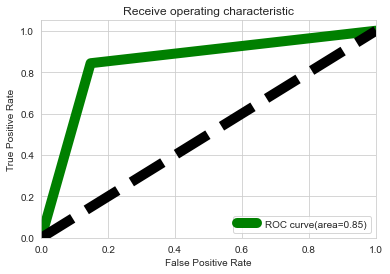

In [170]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='green',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model2: Random Forest Classifier

In [171]:
#random Forest Training and score
rfc.fit(x_train,y_train)
rfc_score=rfc.score(x_train,y_train)

#predict random Forest
pred_train=rfc.predict(x_train)
pred_test=rfc.predict(x_test)
      
#result random Forest
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.9975839574776516  Accuracy Test Score = 0.8405797101449275 

Training Confusion_Matrix 
 [[4101   13]
 [   7 4157]] Testing Confusion_Matrix 
 [[886 174]
 [156 854]]
Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1060
           1       0.83      0.85      0.84      1010

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



## Model Cross Validation

In [172]:
#train and score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val for model
for i in range(2,10):
    cv_rfc_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_rfc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.8251836103594897 Training Score  0.9975839574776516 Testing Score  0.8405797101449275
A cross-fold  3 CV_mean  0.8333066645376452 Training Score  0.9975839574776516 Testing Score  0.8405797101449275
A cross-fold  4 CV_mean  0.8381329725550831 Training Score  0.9975839574776516 Testing Score  0.8405797101449275
A cross-fold  5 CV_mean  0.8408461694720547 Training Score  0.9975839574776516 Testing Score  0.8405797101449275
A cross-fold  6 CV_mean  0.8394938744858043 Training Score  0.9975839574776516 Testing Score  0.8405797101449275
A cross-fold  7 CV_mean  0.839015957276476 Training Score  0.9975839574776516 Testing Score  0.8405797101449275
A cross-fold  8 CV_mean  0.8402726726123664 Training Score  0.9975839574776516 Testing Score  0.8405797101449275
A cross-fold  9 CV_mean  0.8413302893084933 Training Score  0.9975839574776516 Testing Score  0.8405797101449275


### Selected cross fold 9 as cv_score is close to Testing Score

In [173]:
#train and score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

# model cross val score
rfc_cv_score=cross_val_score(rfc,x,y,cv=9) 
rfc_mean=rfc_cv_score.mean()# mean value

print(" CV_mean ",rfc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_mean  0.8424904664001043 Testing Accuracy Score  0.8405797101449275


### AOC_ROC_Graph

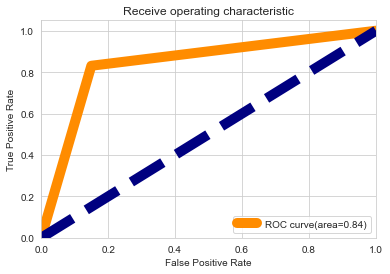

In [174]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Boosting Technique 

## Model3: ADA BOOST Classifier

In [175]:
ada.fit(x_train,y_train)
ada_score=ada.score(x_train,y_train)

#predict
pred_train=ada.predict(x_train)
pred_test=ada.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.8041797535636627  Accuracy Test Score = 0.8057971014492754 

Training Confusion_Matrix 
 [[3188  926]
 [ 695 3469]] Testing Confusion_Matrix 
 [[830 230]
 [172 838]]
Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.78      0.81      1060
           1       0.78      0.83      0.81      1010

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



### Model Cross Validation

In [176]:
#train and score for Ada Boost
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val for Ada Boost
for i in range(2,10):
    cv_ada_score=cross_val_score(ada,x,y,cv=i)
    cv_mean=cv_ada_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7834364128333977 Training Score  0.8041797535636627 Testing Score  0.8057971014492754
A cross-fold  3 CV_mean  0.7903013265764914 Training Score  0.8041797535636627 Testing Score  0.8057971014492754
A cross-fold  4 CV_mean  0.7942597603401623 Training Score  0.8041797535636627 Testing Score  0.8057971014492754
A cross-fold  5 CV_mean  0.7952300698370003 Training Score  0.8041797535636627 Testing Score  0.8057971014492754
A cross-fold  6 CV_mean  0.7969709808668752 Training Score  0.8041797535636627 Testing Score  0.8057971014492754
A cross-fold  7 CV_mean  0.7988101217809694 Training Score  0.8041797535636627 Testing Score  0.8057971014492754
A cross-fold  8 CV_mean  0.7967805482140786 Training Score  0.8041797535636627 Testing Score  0.8057971014492754
A cross-fold  9 CV_mean  0.7975505690728757 Training Score  0.8041797535636627 Testing Score  0.8057971014492754


### Model Slected  Cross Fold is 8 as Cv_Score is close to Testing Score

In [177]:
#Model_predict test
ada_test=ada.predict(x_test)

#cross val score
ada_cv_score=cross_val_score(ada,x,y,cv=8) 
ada_mean=ada_cv_score.mean()

print(" CV_mean ",ada_mean,"Testing Accuracy Score ",accuracy_score(y_test,ada_test))

 CV_mean  0.7967805482140786 Testing Accuracy Score  0.8057971014492754


### Model AUC_ROC_graph

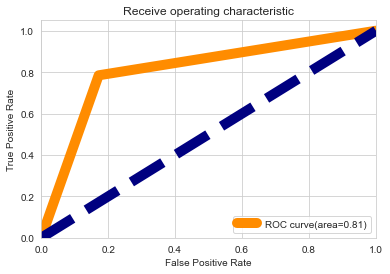

In [178]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model4: Gradient Boosting

In [179]:
#train and score gradient Boosting Classifier
gbc.fit(x_train,y_train)
gbc_score=gbc.score(x_train,y_train)

#predict Gradient Boosting Classifier
pred_train=gbc.predict(x_train)
pred_test=gbc.predict(x_test)

#result gradient Boosting classifier
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.8380043488765402  Accuracy Test Score = 0.8236714975845411 

Training Confusion_Matrix 
 [[3308  806]
 [ 535 3629]] Testing Confusion_Matrix 
 [[839 221]
 [144 866]]
Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      1060
           1       0.80      0.86      0.83      1010

    accuracy                           0.82      2070
   macro avg       0.83      0.82      0.82      2070
weighted avg       0.83      0.82      0.82      2070



#### Model Cross Validation

In [180]:
#predict model 
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_gbc_score=cross_val_score(gbc,x,y,cv=i)
    cv_mean=cv_gbc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7989949748743719 Training Score  0.8380043488765402 Testing Score  0.8236714975845411
A cross-fold  3 CV_mean  0.8106951115145046 Training Score  0.8380043488765402 Testing Score  0.8236714975845411
A cross-fold  4 CV_mean  0.8185156551990723 Training Score  0.8380043488765402 Testing Score  0.8236714975845411
A cross-fold  5 CV_mean  0.816783855534775 Training Score  0.8380043488765402 Testing Score  0.8236714975845411
A cross-fold  6 CV_mean  0.8171712790163309 Training Score  0.8380043488765402 Testing Score  0.8236714975845411
A cross-fold  7 CV_mean  0.820557853116516 Training Score  0.8380043488765402 Testing Score  0.8236714975845411
A cross-fold  8 CV_mean  0.8231689240961019 Training Score  0.8380043488765402 Testing Score  0.8236714975845411
A cross-fold  9 CV_mean  0.8222929411418457 Training Score  0.8380043488765402 Testing Score  0.8236714975845411


### Selected cross fold 8 as cross val score  is close to testing Score 

In [181]:
#predict model 
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val score
gbc_cv_score=cross_val_score(gbc,x,y,cv=8)
gbc_mean=gbc_cv_score.mean()

print(" CV_mean ",gbc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_mean  0.8231689240961019 Testing Accuracy Score  0.8236714975845411


### Model AUC_ROC_graph

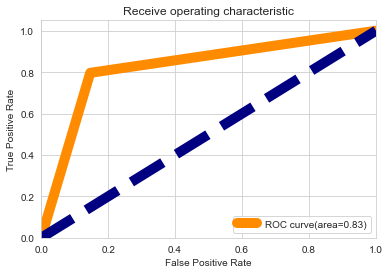

In [182]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model 5: MLP Classifier

In [183]:
#train
mlp.fit(x_train,y_train)
mlp_score=mlp.score(x_train,y_train)

#predict
pred_train=mlp.predict(x_train)
pred_test=mlp.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.8479101232181686  Accuracy Test Score = 0.8067632850241546 

Training Confusion_Matrix 
 [[3309  805]
 [ 454 3710]] Testing Confusion_Matrix 
 [[816 244]
 [156 854]]
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      1060
           1       0.78      0.85      0.81      1010

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



### Model Cross Validation 

In [185]:
# accuracy_score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_mlp_score=cross_val_score(mlp,x,y,cv=i)
    cv_mean=cv_mlp_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7910707383069192 Training Score  0.8479101232181686 Testing Score  0.8067632850241546
A cross-fold  3 CV_mean  0.8002534936262418 Training Score  0.8479101232181686 Testing Score  0.8067632850241546
A cross-fold  4 CV_mean  0.8019907228449943 Training Score  0.8479101232181686 Testing Score  0.8067632850241546
A cross-fold  5 CV_mean  0.8038305512943544 Training Score  0.8479101232181686 Testing Score  0.8067632850241546
A cross-fold  6 CV_mean  0.8028652050618156 Training Score  0.8479101232181686 Testing Score  0.8067632850241546
A cross-fold  7 CV_mean  0.8020939979743472 Training Score  0.8479101232181686 Testing Score  0.8067632850241546
A cross-fold  8 CV_mean  0.8060571069281628 Training Score  0.8479101232181686 Testing Score  0.8067632850241546
A cross-fold  9 CV_mean  0.8057642226174409 Training Score  0.8479101232181686 Testing Score  0.8067632850241546


### Slected cross fold 8 as cross val score is close to Training Score

In [186]:
# accuracy_score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val score
mlp_cv_score=cross_val_score(mlp,x,y,cv=8)
cv_mean=mlp_cv_score.mean()

print(" CV_mean ",cv_mean,"Testing Accuracy Score ",test_accuracy)

 CV_mean  0.8039308677924528 Testing Accuracy Score  0.8067632850241546


### Model Auc_roc_graph

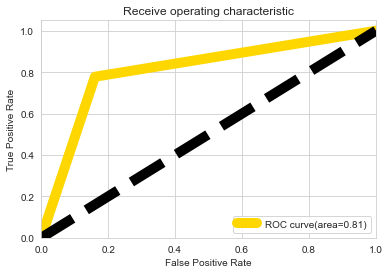

In [187]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='gold',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model 6. SGD Classifier

In [188]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
#train
sgd.fit(x_train,y_train)
sgd_score=sgd.score(x_train,y_train)

#predict
pred_train=sgd.predict(x_train)
pred_test=sgd.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.7533220584682291  Accuracy Test Score = 0.7570048309178744 

Training Confusion_Matrix 
 [[2822 1292]
 [ 750 3414]] Testing Confusion_Matrix 
 [[745 315]
 [188 822]]
Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.70      0.75      1060
           1       0.72      0.81      0.77      1010

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070



### Model Cross Validation 

In [189]:
# accuracy_score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_score=cross_val_score(sgd,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7342481638964051 Training Score  0.7533220584682291 Testing Score  0.7570048309178744
A cross-fold  3 CV_mean  0.746424826631818 Training Score  0.7533220584682291 Testing Score  0.7570048309178744
A cross-fold  4 CV_mean  0.7466177039041361 Training Score  0.7533220584682291 Testing Score  0.7570048309178744
A cross-fold  5 CV_mean  0.7399503599255632 Training Score  0.7533220584682291 Testing Score  0.7570048309178744
A cross-fold  6 CV_mean  0.7465243171144514 Training Score  0.7533220584682291 Testing Score  0.7570048309178744
A cross-fold  7 CV_mean  0.745457540955816 Training Score  0.7533220584682291 Testing Score  0.7570048309178744
A cross-fold  8 CV_mean  0.7524186530491733 Training Score  0.7533220584682291 Testing Score  0.7570048309178744
A cross-fold  9 CV_mean  0.7437179988479795 Training Score  0.7533220584682291 Testing Score  0.7570048309178744


### Slected cross fold 8 as cross val score is close to Training Score

In [190]:
# accuracy_score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val score
cv_score=cross_val_score(sgd,x,y,cv=8)
cv_mean=cv_score.mean()

print(" CV_mean ",cv_mean,"Testing Accuracy Score ",test_accuracy)

 CV_mean  0.7513529933502356 Testing Accuracy Score  0.7570048309178744


### Model Auc_roc_graph

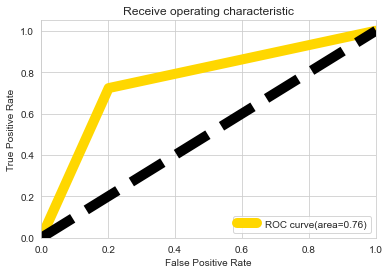

In [191]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='gold',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model with Hyper-Paramter

#### Almost all the models are working in near 80s. I Selected: Extra Tress  and Random Forest Classifier due to following result:

- Model CV_Score is far better.
- Model Testing score and Training accuracy is far better then other Models.
- More Over Model is with better F1 score and has Cv_score is close to testing score

# Grid Search: Random Forest Classifier

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc= RandomForestClassifier()

#Parameter  
parameters={'n_estimators':[100],
            'criterion':['gini', 'entropy', 'log_loss'],
            'n_jobs':[2,4],
           'max_features':['sqrt', 'log2','None'],
           'class_weight':['balanced','balanced_subsample'],
           'random_state':[69]}

gsv=GridSearchCV(rfc,parameters,cv=9,verbose=1)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Fitting 9 folds for each of 36 candidates, totalling 324 fits
Best Parameter  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100, 'n_jobs': 2, 'random_state': 69} Best Score  0.833172083707874


In [229]:
etc= ExtraTreesClassifier(class_weight= 'balanced_subsample', criterion='entropy', max_features= 'sqrt', n_estimators= 180,
                          n_jobs= 3,
                          min_samples_leaf=2,min_weight_fraction_leaf=0.00011,ccp_alpha=0.00001,max_samples=1.0,
                          max_leaf_nodes=16,random_state=619,max_depth=118)

#random Forest Training and score
rfc.fit(x_train,y_train)
rfc_score=rfc.score(x_train,y_train)

#predict random Forest
pred_train2=rfc.predict(x_train)
pred_test2=rfc.predict(x_test)
      
#result random Forest
print("Accuracy Training Score =",accuracy_score(y_train,pred_train2)," Accuracy Test Score =",accuracy_score(y_test,pred_test2),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train2),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test2))
print("Classification Report \n",classification_report(y_test,pred_test2))

Accuracy Training Score = 0.9975839574776516  Accuracy Test Score = 0.8458937198067633 

Training Confusion_Matrix 
 [[4104   10]
 [  10 4154]] Testing Confusion_Matrix 
 [[883 177]
 [142 868]]
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1060
           1       0.83      0.86      0.84      1010

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



### Model Cross Validation Score

In [230]:
#Accuracy_Score
train_accuracy=accuracy_score(y_train,pred_train2)
test_accuracy=accuracy_score(y_test,pred_test2)

#cross val
for i in range(2,10):
    cv_rfc_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_rfc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_Score ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_Score  0.8244105141090066 Training Score  0.9975839574776516 Testing Score  0.8458937198067633
A cross-fold  3 CV_Score  0.8385246721376918 Training Score  0.9975839574776516 Testing Score  0.8458937198067633
A cross-fold  4 CV_Score  0.8383262466177039 Training Score  0.9975839574776516 Testing Score  0.8458937198067633
A cross-fold  5 CV_Score  0.8407490374355275 Training Score  0.9975839574776516 Testing Score  0.8458937198067633
A cross-fold  6 CV_Score  0.8395899884551151 Training Score  0.9975839574776516 Testing Score  0.8458937198067633
A cross-fold  7 CV_Score  0.838435500185796 Training Score  0.9975839574776516 Testing Score  0.8458937198067633
A cross-fold  8 CV_Score  0.8413357174704836 Training Score  0.9975839574776516 Testing Score  0.8458937198067633
A cross-fold  9 CV_Score  0.8416198080246214 Training Score  0.9975839574776516 Testing Score  0.8458937198067633


### Selected Cross Fold 9 , As CV_Score is close to Testing score

In [231]:
#Accuracy_Score
train_accuracy=accuracy_score(y_train,pred_train2)
test_accuracy=accuracy_score(y_test,pred_test2)

#cross val score
rfc_cv_score=cross_val_score(rfc,x,y,cv=9)
rfc_mean=rfc_cv_score.mean()

print(" CV_mean ",rfc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_mean  0.8415243669143089 Testing Accuracy Score  0.8458937198067633


### Model AUC_ROC_score

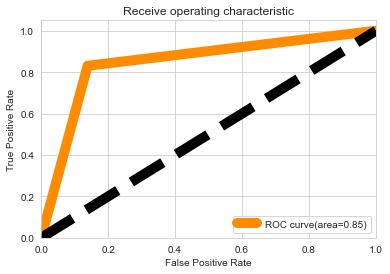

In [232]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test2,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Grid Search [ EXTRA TREES]

In [254]:
# importing library Grid Search CV

from sklearn.model_selection import GridSearchCV

#Parameter  
parameter={ 'criterion':['gini', 'entropy', 'log_loss'],
           'max_features':['sqrt', 'log2','None'],
           'class_weight':['balanced','balanced_subsample'],
           'min_samples_split':[2,3],
          'random_state':[69],
          'n_estimators':[100,180]}

gsv=GridSearchCV(etc,parameter,cv=5,verbose=1)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameter  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 180, 'random_state': 69} Best Score  0.8358282615993111


In [301]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(criterion='entropy', max_features= 'sqrt', min_samples_split= 3 ,n_estimators= 200, n_jobs= 5,
                         min_impurity_decrease=0.00000000001,random_state=69,class_weight='balanced',verbose=0,
                         ccp_alpha=0.000001,max_samples=None,min_weight_fraction_leaf=0.00000001,max_depth=180)

#train and score
etc.fit(x_train,y_train)
etc.score(x_train,y_train)

#predict
pred_train=etc.predict(x_train)
pred_test=etc.predict(x_test)

#result
print("Training Accuracy_score ",accuracy_score(y_train,pred_train)," Testing Accuracy_score ",accuracy_score(y_test,pred_test))
print("Training Confusion_Matrics ",confusion_matrix(y_train,pred_train)," Testing Confusion Matrics ",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Training Accuracy_score  0.9974631553515342  Testing Accuracy_score  0.8521739130434782
Training Confusion_Matrics  [[4098   16]
 [   5 4159]]  Testing Confusion Matrics  [[902 158]
 [148 862]]
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1060
           1       0.85      0.85      0.85      1010

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



### Model Cross Validation Score

In [302]:
#Accuracy_Score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_etc_score=cross_val_score(etc,x,y,cv=i)
    cv_mean=cv_etc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_Score ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_Score  0.8365867800541167 Training Score  0.9974631553515342 Testing Score  0.8521739130434782
A cross-fold  3 CV_Score  0.8517628157990204 Training Score  0.9974631553515342 Testing Score  0.8521739130434782
A cross-fold  4 CV_Score  0.8472168534982605 Training Score  0.9974631553515342 Testing Score  0.8521739130434782
A cross-fold  5 CV_Score  0.8522479762213303 Training Score  0.9974631553515342 Testing Score  0.8521739130434782
A cross-fold  6 CV_Score  0.8521513276617685 Training Score  0.9974631553515342 Testing Score  0.8521739130434782
A cross-fold  7 CV_Score  0.8498368224150282 Training Score  0.9974631553515342 Testing Score  0.8521739130434782
A cross-fold  8 CV_Score  0.8532195713215017 Training Score  0.9974631553515342 Testing Score  0.8521739130434782
A cross-fold  9 CV_Score  0.8527316759374881 Training Score  0.9974631553515342 Testing Score  0.8521739130434782


### Selected Cross Fold-8 as cv score is close to Testing Score

In [303]:
#Accuracy_Score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val score
etc_cv_score=cross_val_score(etc,x,y,cv=8)
etc_mean=etc_cv_score.mean()

print(" CV_mean ",etc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_mean  0.8532195713215017 Testing Accuracy Score  0.8521739130434782


### Model_AUC_ROC_Graph

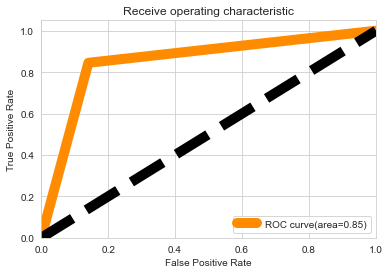

In [304]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

## Random Forest Classifier is boosted to 85 percentage.

### However Both the Models are working well ,I would select Extra Tress Classifier at the best of 85 percentage

- Model CV_Score is far better.

- Selecting Extra Trees as Training score little better along with cv score is better

- cv score increased Present CV_Score is 85.4 got increased after Hyperparameter.

# Saving Model

In [305]:
import pickle
pickle.dump(etc,open('churn.pkl','wb'))

In [306]:
# Loading Model Model
import pickle
loaded_model =pickle.load(open('churn.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

85.21739130434783


In [307]:
model_churn=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=["Predicted","Original"])
model_churn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021